In [303]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import pandas as pd
import shapefile as shp
import seaborn as sns
import numpy as np




#reading the shapefile
shap = gpd.read_file('Shapes/district.shp')



In [304]:
df_all = pd.read_csv('df_all.csv')
rent_smart = pd.read_csv('rent_smart.csv')


In [305]:
#dropping the rows that don't have Housing complaints as a vaiolation type

rent_smart_filtered = rent_smart[rent_smart['violation_type'] == 'Housing Complaints']

#replacing from df_all to rent_smart 

all_copy = rent_smart_filtered.copy()

all_copy

date      violation_type  \
154         2022-10-20 17:55:00  Housing Complaints   
156         2022-10-20 16:29:00  Housing Complaints   
158     2022-10-20 16:26:01.193  Housing Complaints   
159         2022-10-20 15:58:00  Housing Complaints   
161         2022-10-20 15:56:00  Housing Complaints   
...                         ...                 ...   
308489      2017-11-19 13:13:00  Housing Complaints   
308492      2017-11-19 09:04:00  Housing Complaints   
308551      2017-11-18 23:46:00  Housing Complaints   
308554      2017-11-18 13:49:00  Housing Complaints   
308555      2017-11-18 13:23:00  Housing Complaints   

                             description                      address  \
154                               Zoning      160 Savannah Ave, 02126   
156                    Work w/out Permit  1516-1518 Tremont St, 02120   
158          Building Inspection Request  1516-1518 Tremont St, 02120   
159     Unsatisfactory Living Conditions      50 Fisher Ave #1, 02120   
161     Unsatisfactory Living Conditions    370 Meridian St #1, 02128   
...                                  ...                          ...   
308489    Heat - Excessive, Insufficient          41 Hosmer St, 02126   
308492              Working Beyond Hours      345 Harrison Ave, 02118   
308551    Pest Infestation - Residential  176 Hyde Park Ave #1, 02130   
308554                        Electrical  178 Brighton Ave #10, 02134   
308555              Working Beyond Hours          56 Temple St, 02114   

         neighborhood  zip_code      parcel                             owner  \
154          Mattapan      2126  1802291001                   SESAY CECILIA M   
156      Mission Hill      2120  1000558000              TREMONT & BURNEY LLC   
158      Mission Hill      2120  1000558000              TREMONT & BURNEY LLC   
159      Mission Hill      2120  1001322000  FIFTY FISHER AVENUE LLC MASS LLC   
161       East Boston      2128   103624000                DUMITRESCU MIHAI O   
...               ...       ...         ...                               ...   
308489       Mattapan      2126  1404144000                    MCGREGOR 1 LLC   
308492        Roxbury      2118   306337000                  345 HARRISON LLC   
308551  Jamaica Plain      2130  1904772000       HYDE PARK PLACE CONDO TRUST   
308554        Allston      2134  2100898000           FIFTY 6 PARK VALE & 178   
308555         Boston      2114   300004000         FIFTY 6 TEMPLE STREET LLC   

        year built  year remodeled                 property_type   latitude  \
154         1920.0             NaN          Residential 1-family  42.273330   
156         1899.0          1999.0    Mixed Use (Res. and Comm.)  42.332150   
158         1899.0          1999.0    Mixed Use (Res. and Comm.)  42.332150   
159         1900.0             NaN          Residential 3-family  42.327510   
161         1890.0             NaN          Residential 3-family  42.379350   
...            ...             ...                           ...        ...   
308489      1905.0          1960.0  Residential 4 or more family  42.280350   
308492      2016.0             NaN    Mixed Use (Res. and Comm.)  42.344885   
308551      1899.0          2005.0             Condominium Main*  42.294990   
308554      1999.0          2018.0             Condominium Main*  42.352960   
308555      1899.0          2016.0  Residential 4 or more family  42.359733   

        longitude  
154    -71.101210  
156    -71.099710  
158    -71.099710  
159    -71.102090  
161    -71.039490  
...           ...  
308489 -71.089870  
308492 -71.064224  
308551 -71.116540  
308554 -71.133440  
308555 -71.063444  

[54237 rows x 13 columns]

<AxesSubplot: >

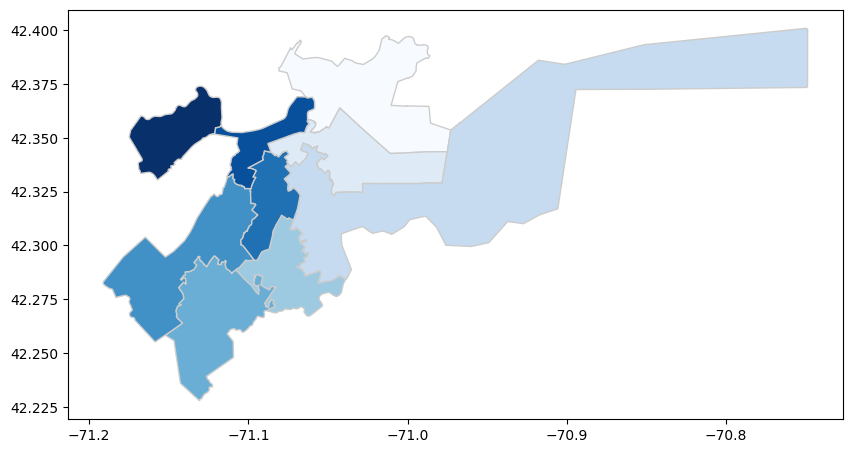

In [306]:
fig, ax = plt.subplots(figsize = (10,10))
shap.plot(ax = ax, cmap = 'Blues', edgecolor='0.8')

In [307]:
geometry = [Point(xy) for xy in zip(all_copy['longitude'], all_copy['latitude'])]

#shap.plot(ax = ax, cmap = 'BuGn', edgecolor='0.8')

crs = {'init': 'epsg:4326'}

geo_all= gpd.GeoDataFrame(all_copy, crs= crs,  geometry = geometry)

print("done")

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


done


In [308]:
#isolating shapes by districts

shape_1 = shap.loc[shap['LONGNAME']=='District 1']
shape_2 = shap.loc[shap['LONGNAME']=='District 2']
shape_3 = shap.loc[shap['LONGNAME']=='District 3']
shape_4 = shap.loc[shap['LONGNAME']=='District 4']
shape_5 = shap.loc[shap['LONGNAME']=='District 5']
shape_6 = shap.loc[shap['LONGNAME']=='District 6']
shape_7 = shap.loc[shap['LONGNAME']=='District 7']
shape_8 = shap.loc[shap['LONGNAME']=='District 8']
shape_9 = shap.loc[shap['LONGNAME']=='District 9']

In [309]:
#all_districts = gpd.GeoDataFrame(df_all, crs= crs, geometry = geometry)

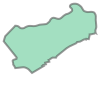

In [310]:
#isolating district polygons


shape_1_poly = shape_1.iloc[0]['geometry']
shape_2_poly = shape_2.iloc[0]['geometry']
shape_3_poly = shape_3.iloc[0]['geometry']
shape_4_poly = shape_4.iloc[0]['geometry']
shape_5_poly = shape_5.iloc[0]['geometry']
shape_6_poly = shape_6.iloc[0]['geometry']
shape_7_poly = shape_7.iloc[0]['geometry']
shape_8_poly = shape_8.iloc[0]['geometry']
shape_9_poly = shape_9.iloc[0]['geometry']




shape_9_poly

In [311]:
all_sorting = all_copy.copy()

In [312]:


geo_all['intersect district 1'] = geo_all.intersects(shape_1_poly)
geo_all['intersect district 2'] = geo_all.intersects(shape_2_poly)
geo_all['intersect district 3'] = geo_all.intersects(shape_3_poly)
geo_all['intersect district 4'] = geo_all.intersects(shape_4_poly)
geo_all['intersect district 5'] = geo_all.intersects(shape_5_poly)
geo_all['intersect district 6'] = geo_all.intersects(shape_6_poly)
geo_all['intersect district 7'] = geo_all.intersects(shape_7_poly)
geo_all['intersect district 8'] = geo_all.intersects(shape_8_poly)
geo_all['intersect district 9'] = geo_all.intersects(shape_9_poly)

geo_all

date      violation_type  \
154         2022-10-20 17:55:00  Housing Complaints   
156         2022-10-20 16:29:00  Housing Complaints   
158     2022-10-20 16:26:01.193  Housing Complaints   
159         2022-10-20 15:58:00  Housing Complaints   
161         2022-10-20 15:56:00  Housing Complaints   
...                         ...                 ...   
308489      2017-11-19 13:13:00  Housing Complaints   
308492      2017-11-19 09:04:00  Housing Complaints   
308551      2017-11-18 23:46:00  Housing Complaints   
308554      2017-11-18 13:49:00  Housing Complaints   
308555      2017-11-18 13:23:00  Housing Complaints   

                             description                      address  \
154                               Zoning      160 Savannah Ave, 02126   
156                    Work w/out Permit  1516-1518 Tremont St, 02120   
158          Building Inspection Request  1516-1518 Tremont St, 02120   
159     Unsatisfactory Living Conditions      50 Fisher Ave #1, 02120   
161     Unsatisfactory Living Conditions    370 Meridian St #1, 02128   
...                                  ...                          ...   
308489    Heat - Excessive, Insufficient          41 Hosmer St, 02126   
308492              Working Beyond Hours      345 Harrison Ave, 02118   
308551    Pest Infestation - Residential  176 Hyde Park Ave #1, 02130   
308554                        Electrical  178 Brighton Ave #10, 02134   
308555              Working Beyond Hours          56 Temple St, 02114   

         neighborhood  zip_code      parcel                             owner  \
154          Mattapan      2126  1802291001                   SESAY CECILIA M   
156      Mission Hill      2120  1000558000              TREMONT & BURNEY LLC   
158      Mission Hill      2120  1000558000              TREMONT & BURNEY LLC   
159      Mission Hill      2120  1001322000  FIFTY FISHER AVENUE LLC MASS LLC   
161       East Boston      2128   103624000                DUMITRESCU MIHAI O   
...               ...       ...         ...                               ...   
308489       Mattapan      2126  1404144000                    MCGREGOR 1 LLC   
308492        Roxbury      2118   306337000                  345 HARRISON LLC   
308551  Jamaica Plain      2130  1904772000       HYDE PARK PLACE CONDO TRUST   
308554        Allston      2134  2100898000           FIFTY 6 PARK VALE & 178   
308555         Boston      2114   300004000         FIFTY 6 TEMPLE STREET LLC   

        year built  year remodeled  ...                    geometry  \
154         1920.0             NaN  ...  POINT (-71.10121 42.27333)   
156         1899.0          1999.0  ...  POINT (-71.09971 42.33215)   
158         1899.0          1999.0  ...  POINT (-71.09971 42.33215)   
159         1900.0             NaN  ...  POINT (-71.10209 42.32751)   
161         1890.0             NaN  ...  POINT (-71.03949 42.37935)   
...            ...             ...  ...                         ...   
308489      1905.0          1960.0  ...  POINT (-71.08987 42.28035)   
308492      2016.0             NaN  ...  POINT (-71.06422 42.34489)   
308551      1899.0          2005.0  ...  POINT (-71.11654 42.29499)   
308554      1999.0          2018.0  ...  POINT (-71.13344 42.35296)   
308555      1899.0          2016.0  ...  POINT (-71.06344 42.35973)   

        intersect district 1  intersect district 2 intersect district 3  \
154                    False                 False                False   
156                    False                 False                False   
158                    False                 False                False   
159                    False                 False                False   
161                     True                 False                False   
...                      ...                   ...                  ...   
308489                 False                 False                False   
308492                 False                 False             

In [313]:
#Filtering out the points not enclosed in a certain district

geo_district_1_filtered = geo_all [geo_all['intersect district 1'] == True]
geo_exclude_district_1  = geo_all [geo_all['intersect district 1'] == False]

geo_district_2_filtered = geo_all [geo_all['intersect district 2'] == True]
geo_exclude_district_2  = geo_all [geo_all['intersect district 2'] == False]

geo_district_3_filtered = geo_all [geo_all['intersect district 3'] == True]
geo_exclude_district_3  = geo_all [geo_all['intersect district 3'] == False]

geo_district_4_filtered = geo_all [geo_all['intersect district 4'] == True]
geo_exclude_district_4  = geo_all [geo_all['intersect district 4'] == False]

geo_district_5_filtered = geo_all [geo_all['intersect district 5'] == True]
geo_exclude_district_5  = geo_all [geo_all['intersect district 5'] == False]

geo_district_6_filtered = geo_all [geo_all['intersect district 6'] == True]
geo_exclude_district_6  = geo_all [geo_all['intersect district 6'] == False]

geo_district_7_filtered = geo_all [geo_all['intersect district 7'] == True]
geo_exclude_district_7  = geo_all [geo_all['intersect district 7'] == False]

geo_district_8_filtered = geo_all [geo_all['intersect district 8'] == True]
geo_exclude_district_8  = geo_all [geo_all['intersect district 8'] == False]

geo_district_9_filtered = geo_all [geo_all['intersect district 9'] == True]
geo_exclude_district_9  = geo_all [geo_all['intersect district 9'] == False]





# District 1 Analysis

### violation descriptions

In [314]:

top_10_type_violation_d1 = geo_district_1_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d1

Contractors Complaint               1096
Work w/out Permit                    982
Unsatisfactory Living Conditions     717
Unsafe Dangerous Conditions          535
Building Inspection Request          516
Working Beyond Hours                 506
Pest Infestation - Residential       443
Protection of Adjoining Property     281
Exceeding Terms of Permit            241
Electrical                           230
Name: description, dtype: int64

In [315]:
#removing other violation descriptions
geo_district_1_filtered_1 = geo_district_1_filtered[geo_district_1_filtered['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 'Building Inspection Request', 'Working Beyond Hours', 
                                                                                                 'Pest Infestation - Residential', 'Protection of Adjoining Property', 
                                                                                                 'Exceeding Terms of Permit', 'Electrical'])]

<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 1'}>

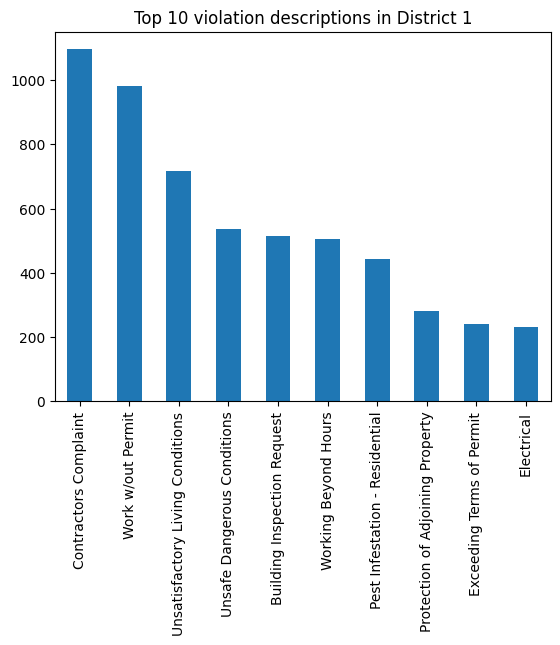

In [316]:
top_10_type_violation_d1.plot(kind='bar', title = 'Top 10 violation descriptions in District 1')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 1'}>

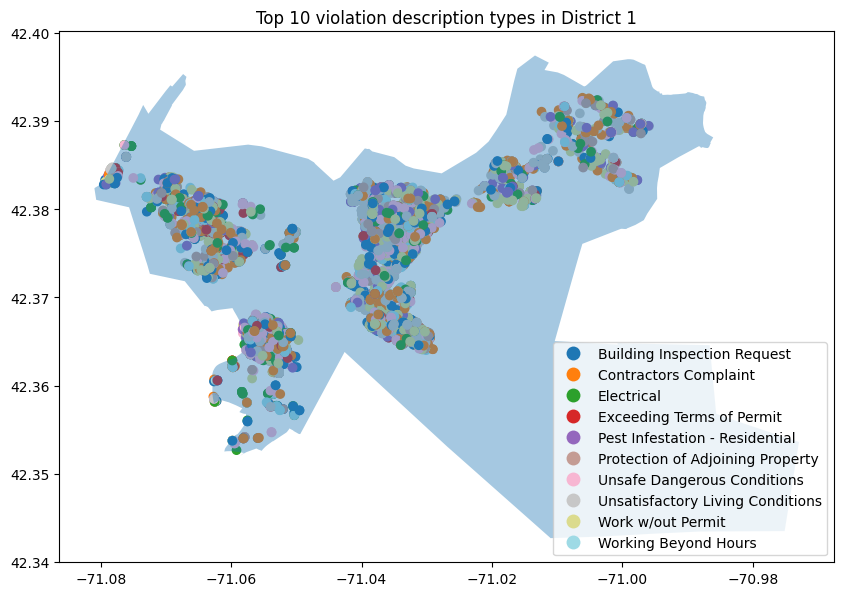

In [317]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_district_1_filtered_1['longitude'], geo_district_1_filtered_1['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_1 = gpd.GeoDataFrame(geo_district_1_filtered_1, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in District 1')

geo_district_1.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shape_1.plot(ax = ax,  alpha = 0.4)

### owner analysis

In [318]:
top_10_type_owners_d1 = geo_district_1_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d1

SOLSKINN PROPERTIES LLC              96
MERCANTILE WHARF ASSOCIATES          81
MCKINLEY INVESTMENT GROUP  LLC       73
EBSP ASSOCIATES LLC MASS LLC         50
PETER PAN PROPERTIES LLC MASS LLC    37
BULFINCH CROSSING PRIMARY            32
VILLA MICHAELANGELO INC              27
DAGOSTINO GRACE                      25
SHAUGHNESSY BRIAN F                  25
LAQUIDARA ROBERT                     24
Name: owner, dtype: int64

<AxesSubplot: title={'center': 'Top 10 violators in District 1'}>

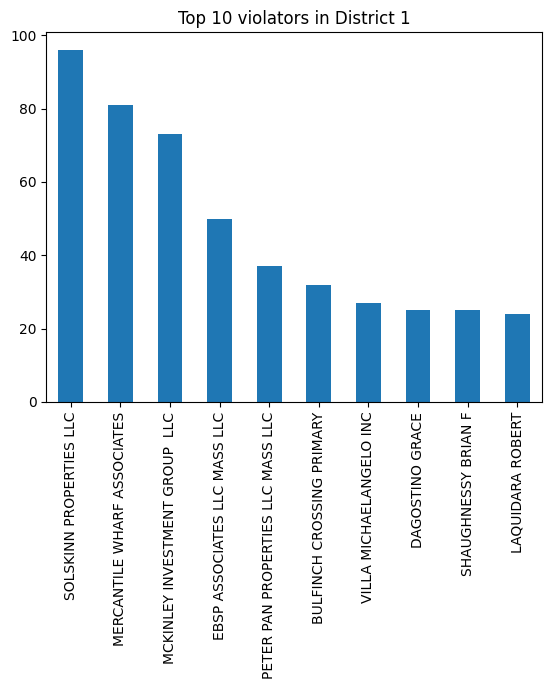

In [319]:
top_10_type_owners_d1.plot(kind='bar', title = 'Top 10 violators in District 1')

In [320]:
#filtering out other owners
geo_district_1_filtered_owners = geo_district_1_filtered[geo_district_1_filtered['owner'].isin(['SOLSKINN PROPERTIES LLC', 'MERCANTILE WHARF ASSOCIATES', 
                                                                                                'MCKINLEY INVESTMENT GROUP  LLC', 'EBSP ASSOCIATES LLC MASS LLC', 
                                                                                                'PETER PAN PROPERTIES LLC MASS LLC', 'BULFINCH CROSSING PRIMARY',
                                                                                                'VILLA MICHAELANGELO INC', 'DAGOSTINO GRACE', 
                                                                                                'SHAUGHNESSY BRIAN F','LAQUIDARA ROBERT'])]

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 1'}>

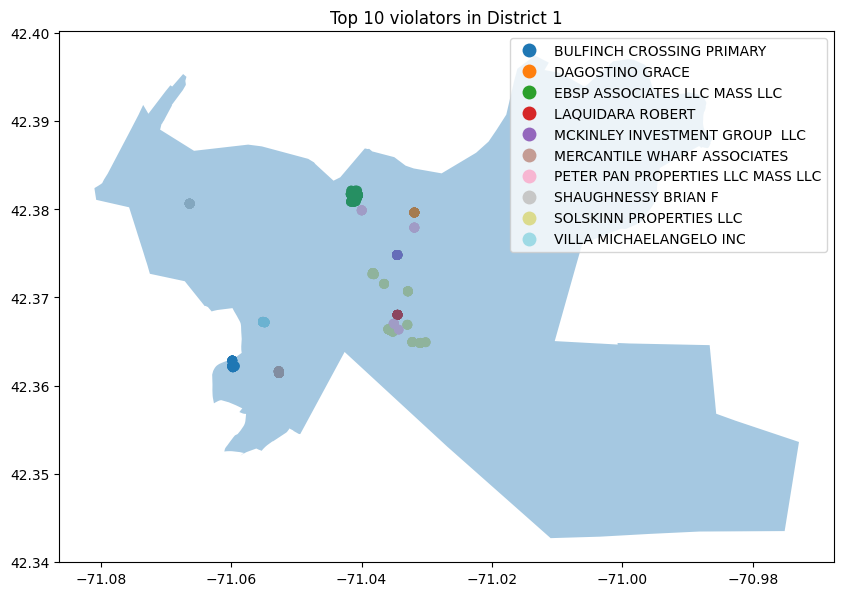

In [321]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_1_filtered_owners['longitude'], geo_district_1_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_1_own = gpd.GeoDataFrame(geo_district_1_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 1')

geo_district_1_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_1.plot(ax = ax,  alpha = 0.4)

### analysis of top 10 violators in other districts excluding district 1

In [322]:
#isolating the top 5 violators 
geo_except_district_1_owners = geo_exclude_district_1[geo_exclude_district_1['owner'].isin(['SOLSKINN PROPERTIES LLC', 'MERCANTILE WHARF ASSOCIATES', 
                                                                                                'MCKINLEY INVESTMENT GROUP  LLC', 'EBSP ASSOCIATES LLC MASS LLC', 
                                                                                                'PETER PAN PROPERTIES LLC MASS LLC'])]

geo_except_district_1_owners

date      violation_type                  description  \
118826  2020-12-10 16:14:00  Housing Complaints  Building Inspection Request   
195024  2019-09-05 15:37:00  Housing Complaints                 Overcrowding   
195025  2019-09-05 15:33:00  Housing Complaints        Chronic Dampness/Mold   

                       address neighborhood  zip_code      parcel  \
118826  67 Dakota St #3, 02124   Dorchester      2124  1702342000   
195024  67 Dakota St #2, 02124   Dorchester      2124  1702342000   
195025  67 Dakota St #3, 02124   Dorchester      2124  1702342000   

                                 owner  year built  year remodeled  ...  \
118826  MCKINLEY INVESTMENT GROUP  LLC      1905.0          2015.0  ...   
195024  MCKINLEY INVESTMENT GROUP  LLC      1905.0          2015.0  ...   
195025  MCKINLEY INVESTMENT GROUP  LLC      1905.0          2015.0  ...   

                          geometry  intersect district 1  \
118826  POINT (-71.06995 42.29916)                 False   
195024  POINT (-71.06995 42.29916)                 False   
195025  POINT (-71.06995 42.29916)                 False   

        intersect district 2 intersect district 3  intersect district 4  \
118826                 False                False                  True   
195024                 False                False                  True   
195025                 False                False                  True   

        intersect district 5  intersect district 6  intersect district 7  \
118826                 False                 False                 False   
195024                 False                 False                 False   
195025                 False                 False                 False   

        intersect district 8  intersect district 9  
118826                 False                 False  
195024                 False                 False  
195025                 False                 False  

[3 rows x 23 columns]

In [323]:
#violations of the top 5 owners from d1 in other districts
violation_excluding_d1 = geo_except_district_1_owners['description'].value_counts()
violation_excluding_d1


Building Inspection Request    1
Overcrowding                   1
Chronic Dampness/Mold          1
Name: description, dtype: int64

<AxesSubplot: title={'center': 'Violations in other districts from top D1 violators'}>

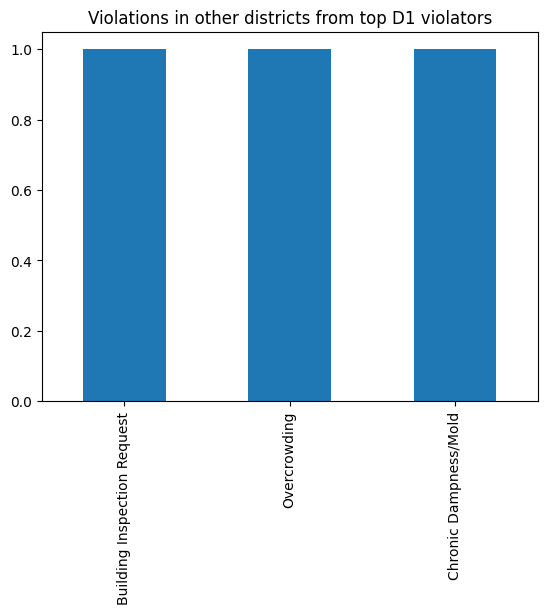

In [324]:
violation_excluding_d1.plot(kind='bar', title = 'Violations in other districts from top D1 violators')

In [325]:
violators_excluding_d1 = geo_except_district_1_owners['owner'].value_counts()
violators_excluding_d1
#top_10_type_owners_d1

MCKINLEY INVESTMENT GROUP  LLC    3
Name: owner, dtype: int64

<AxesSubplot: title={'center': '# of Violations in other districts from top D1 violators'}>

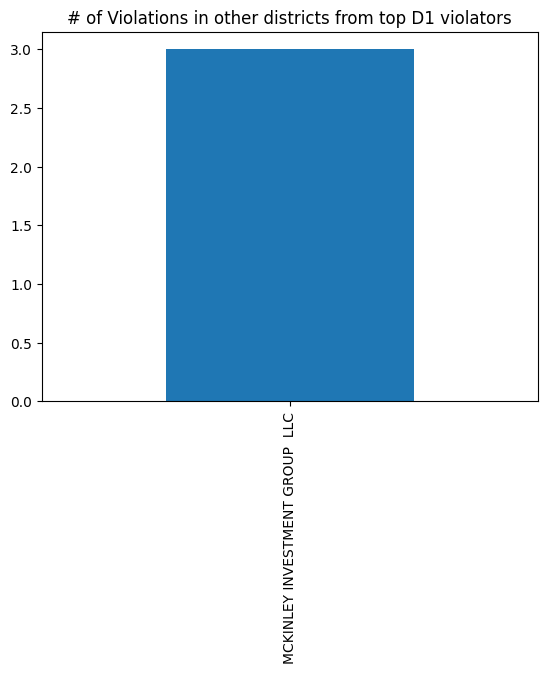

In [326]:
violators_excluding_d1.plot(kind='bar', title = '# of Violations in other districts from top D1 violators')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Violations in other Districts from top District 1 violators '}>

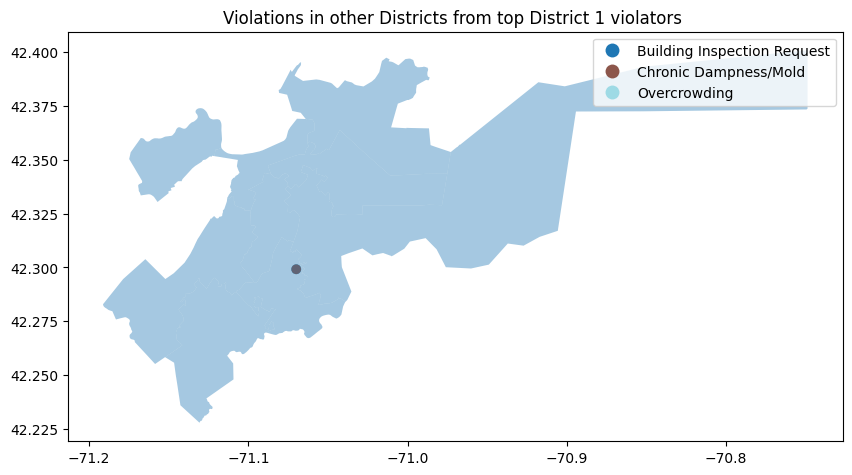

In [327]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_except_district_1_owners['longitude'], geo_except_district_1_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_except_1 = gpd.GeoDataFrame(geo_except_district_1_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Violations in other Districts from top District 1 violators ')

geo_district_except_1.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)

# District 2

### violations descriptions

In [328]:
#violations in district 2
top_10_type_violation_d2 = geo_district_2_filtered['description'].value_counts().nlargest(10)

top_10_type_violation_d2

Work w/out Permit                   1102
Contractors Complaint               1067
Working Beyond Hours                 710
Unsafe Dangerous Conditions          514
Building Inspection Request          452
Unsatisfactory Living Conditions     417
Pest Infestation - Residential       404
Exceeding Terms of Permit            214
Protection of Adjoining Property     207
Electrical                           170
Name: description, dtype: int64

In [329]:
#removing other violation descriptions
geo_district_2_filtered_violation = geo_district_2_filtered[geo_district_2_filtered['description'].isin(['Work w/out Permit', 'Contractors Complaint',
                                                                                                         'Working Beyond Hours', 'Unsafe Dangerous Conditions',
                                                                                                         'Building Inspection Request', 'Unsatisfactory Living Conditions', 
                                                                                                         'Pest Infestation - Residential', 'Exceeding Terms of Permit',
                                                                                                         'Protection of Adjoining Property', 'Electrical'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 2'}>

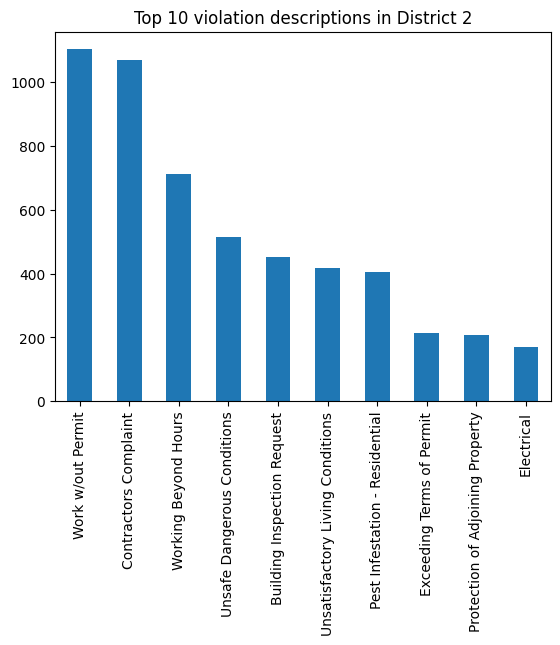

In [330]:
top_10_type_violation_d2.plot(kind='bar', title = 'Top 10 violation descriptions in District 2')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 2'}>

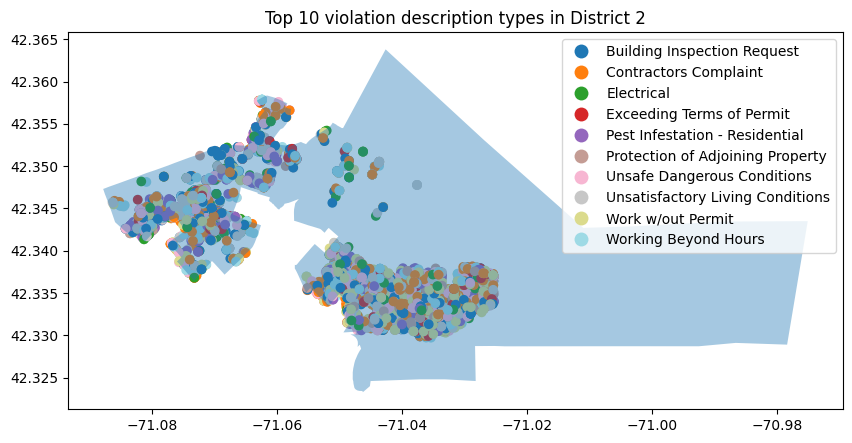

In [331]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_district_2_filtered_violation['longitude'], geo_district_2_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_2 = gpd.GeoDataFrame(geo_district_2_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in District 2')

geo_district_2.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shape_2.plot(ax = ax,  alpha = 0.4)

### owner analysis


In [332]:
top_10_type_owners_d2 = geo_district_2_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d2

RADCLIFFE RUSSELL F ETAL        53
CONNOLLY DIANE M                38
FOX STREET LLC                  37
SKG REALTY LLC                  33
VIVIENDAS LLC                   33
MAHONEY MARGARET F              29
ARTS YVONNE M TS                29
CSTO WINN OWNER LLC MASS LLC    28
399 CONGRESS LLC                27
MIGLIORI SCOTT                  26
Name: owner, dtype: int64

In [333]:
#isolating the top violators
geo_district_2_filtered_owners = geo_district_2_filtered[geo_district_2_filtered['owner'].isin([
    'RADCLIFFE RUSSELL F ETAL', 'CONNOLLY DIANE M',
    'FOX STREET LLC', 'SKG REALTY LLC', 
    'VIVIENDAS LLC','MAHONEY MARGARET F',
    'ARTS YVONNE M TS' , 'CSTO WINN OWNER LLC MASS LLC',
    '399 CONGRESS LLC', 'MIGLIORI SCOTT'
])]


<AxesSubplot: title={'center': 'Top 10 violators in District 2'}>

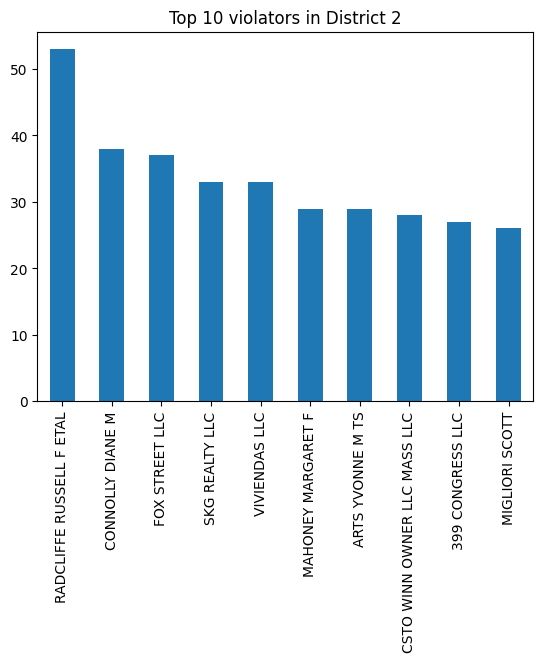

In [334]:
top_10_type_owners_d2.plot(kind='bar', title = 'Top 10 violators in District 2')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 2'}>

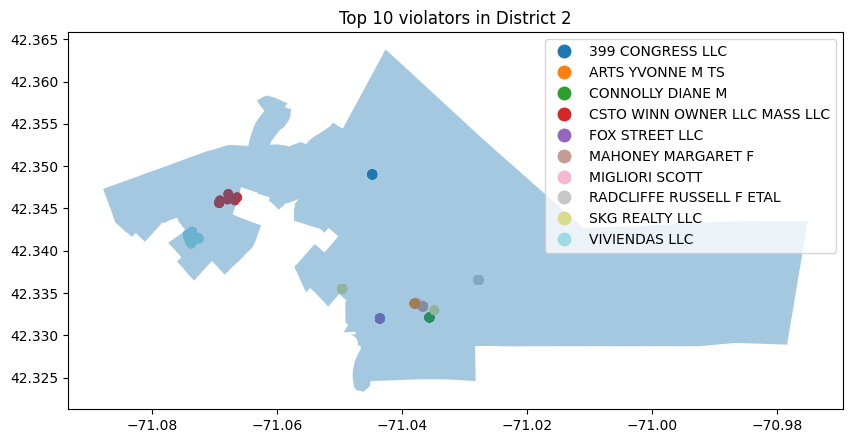

In [335]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_2_filtered_owners['longitude'], geo_district_2_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_2_own = gpd.GeoDataFrame(geo_district_2_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 2')

geo_district_2_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_2.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 2

In [336]:
geo_except_district_2_owners = geo_exclude_district_2[geo_exclude_district_2['owner'].isin(['RADCLIFFE RUSSELL F ETAL', 'CONNOLLY DIANE M',
                                                                                            'FOX STREET LLC', 'SKG REALTY LLC', 
                                                                                            'VIVIENDAS LLC'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_2_owners

Empty GeoDataFrame
Columns: [date, violation_type, description, address, neighborhood, zip_code, parcel, owner, year built, year remodeled, property_type, latitude, longitude, geometry, intersect district 1, intersect district 2, intersect district 3, intersect district 4, intersect district 5, intersect district 6, intersect district 7, intersect district 8, intersect district 9]
Index: []

[0 rows x 23 columns]

the owners do not have properties in other districts

# District 3
### violation descriptions

In [337]:
top_10_type_violation_d3 = geo_district_3_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d3

Unsatisfactory Living Conditions    935
Work w/out Permit                   805
Pest Infestation - Residential      739
Contractors Complaint               554
Building Inspection Request         365
Unsafe Dangerous Conditions         352
Heat - Excessive, Insufficient      339
Working Beyond Hours                320
Mice Infestation - Residential      169
Electrical                          159
Name: description, dtype: int64

In [338]:
#removing other descriptions
geo_district_3_filtered_violation = geo_district_3_filtered[geo_district_3_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Work w/out Permit', 
    'Pest Infestation - Residential', 'Contractors Complaint', 
    'Building Inspection Request', 'Unsafe Dangerous Conditions', 
    'Heat - Excessive, Insufficient', 'Working Beyond Hours', 
    'Mice Infestation - Residential', 'Electrical'])]

<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 3'}>

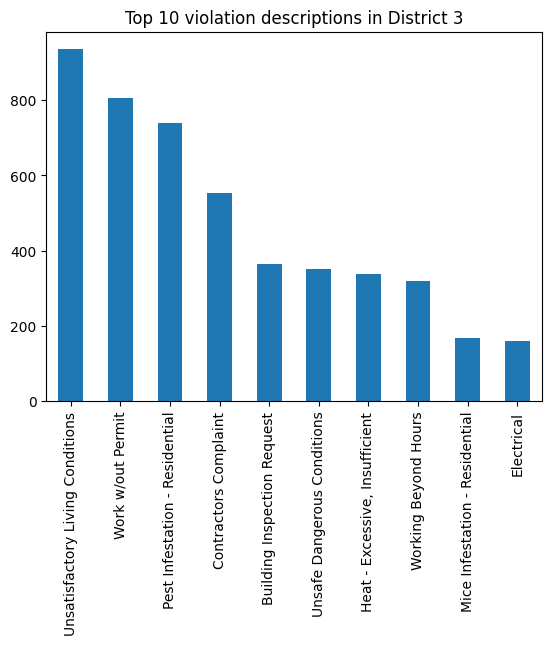

In [339]:
top_10_type_violation_d3.plot(kind='bar', title = 'Top 10 violation descriptions in District 3')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 3'}>

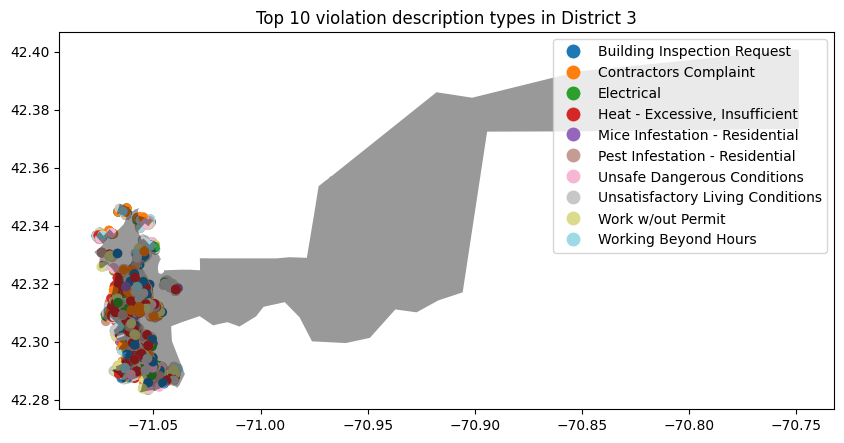

In [340]:
geometry = [Point(xy) for xy in zip(geo_district_3_filtered_violation['longitude'], geo_district_3_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_3 = gpd.GeoDataFrame(geo_district_3_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in District 3')

geo_district_3.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_3.plot(ax = ax, alpha = 0.4, color = 'black')

### owner analysis

In [341]:
top_10_type_owners_d3 = geo_district_3_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d3 

HARBOR POINT APTS CO LESSEE       83
FLYNN KATHLEEN                    59
COMMUNITY DEVELOPMENT             51
COURT SQUARE PRESS BUILDING       44
BAKER THOMAS                      40
VICTORY EQUITY INVESTMENT  LLC    36
57-59 FRANKLIN 02145 LLC          33
WALTON JEANETTE TS                32
MA YU KUN                         32
HOME RECONSTRUCTION LLC           27
Name: owner, dtype: int64

In [342]:
#removing other owners
geo_district_3_filtered_owners = geo_district_3_filtered[geo_district_3_filtered['owner'].isin([
    'HARBOR POINT APTS CO LESSEE', 'FLYNN KATHLEEN', 
    'COMMUNITY DEVELOPMENT', 'COURT SQUARE PRESS BUILDING',
    'BAKER THOMAS', 'VICTORY EQUITY INVESTMENT  LLC', 
    '57-59 FRANKLIN 02145 LLC', 'WALTON JEANETTE TS',
    'MA YU KUN', 'HOME RECONSTRUCTION LLC'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 3'}>

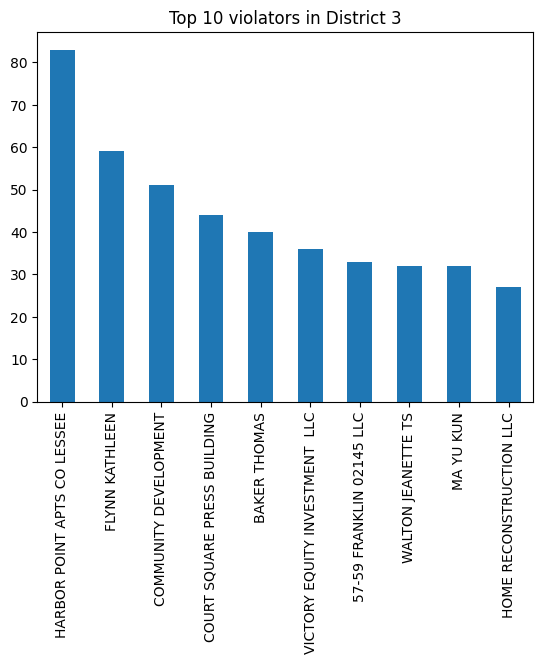

In [343]:
top_10_type_owners_d3.plot(kind='bar', title = 'Top 10 violators in District 3')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 3'}>

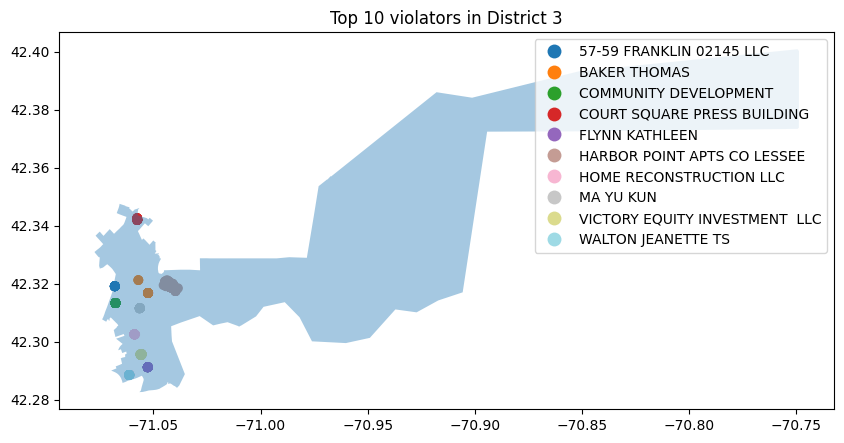

In [344]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_3_filtered_owners['longitude'], geo_district_3_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_3_own = gpd.GeoDataFrame(geo_district_3_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 3')

geo_district_3_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_3.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 3

In [345]:
geo_except_district_3_owners = geo_exclude_district_3[geo_exclude_district_3['owner'].isin(['HARBOR POINT APTS CO LESSEE', 'FLYNN KATHLEEN', 
                                                                                            'COMMUNITY DEVELOPMENT', 'COURT SQUARE PRESS BUILDING',
                                                                                            'BAKER THOMAS'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_3_owners

Empty GeoDataFrame
Columns: [date, violation_type, description, address, neighborhood, zip_code, parcel, owner, year built, year remodeled, property_type, latitude, longitude, geometry, intersect district 1, intersect district 2, intersect district 3, intersect district 4, intersect district 5, intersect district 6, intersect district 7, intersect district 8, intersect district 9]
Index: []

[0 rows x 23 columns]

The owners do not have properties in other districts 

# District 4

### violation descriptions

In [346]:
#violations
top_10_type_violation_d4 = geo_district_4_filtered['description'].value_counts().nlargest(10)

top_10_type_violation_d4

Unsatisfactory Living Conditions       1926
Heat - Excessive, Insufficient          838
Work w/out Permit                       563
Pest Infestation - Residential          416
Building Inspection Request             414
Mice Infestation - Residential          335
Unsafe Dangerous Conditions             289
Contractors Complaint                   265
Electrical                              233
Maintenance Complaint - Residential     209
Name: description, dtype: int64

In [347]:
#filtering out 
geo_district_4_filtered_violation = geo_district_4_filtered[geo_district_4_filtered['description'].isin(
    ['Unsatisfactory Living Conditions', 'Heat - Excessive, Insufficient',
     'Work w/out Permit', 'Pest Infestation - Residential',
     'Building Inspection Request', 'Mice Infestation - Residential',
     'Unsafe Dangerous Conditions','Contractors Complaint',
     'Electrical ','Maintenance Complaint - Residential'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 4'}>

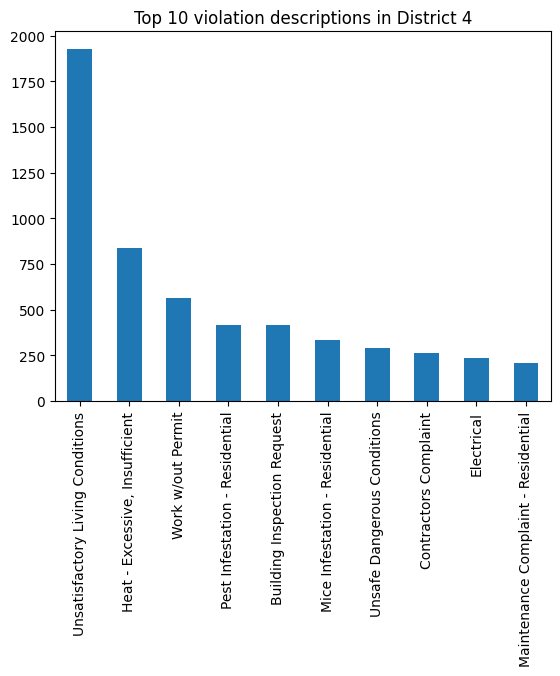

In [348]:
top_10_type_violation_d4.plot(kind='bar', title = 'Top 10 violation descriptions in District 4')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 4'}>

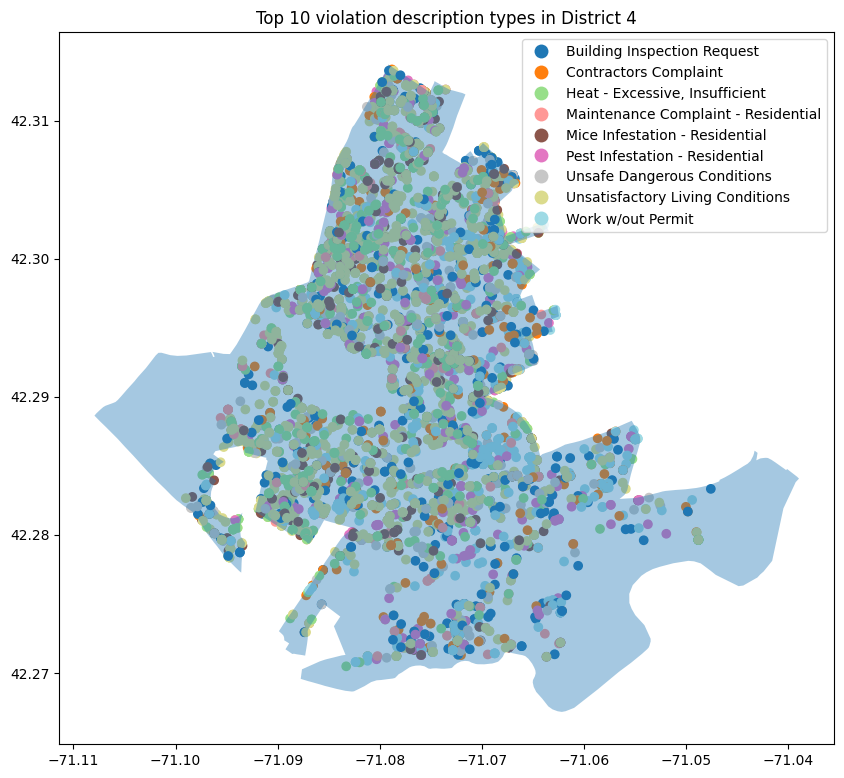

In [349]:
geometry = [Point(xy) for xy in zip(geo_district_4_filtered_violation['longitude'], geo_district_4_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_4 = gpd.GeoDataFrame(geo_district_4_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in District 4')

geo_district_4.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_4.plot(ax = ax, alpha = 0.4)

 ### owner analysis

In [350]:
top_10_type_owners_d4 = geo_district_4_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d4 

WASHINGTON COLUMBIA II MASS LPS         79
TALBOT BERNARD HOUSING LLC MASS LLC     68
OGBEBOR UWA F                           58
WASHINGTON COLUMBIA LPS MASS LPS        55
JPNDC  PITTS  LLC                       51
GRANITE LENA PARK MASS LP               50
TRI CAPITAL DEVELOPMENT LLC MASS LLC    44
Q-G II HOUSING MASS LP                  40
GROVE HALL REDEVELOPER LLC MASS LLC     38
CESCO LLC MASS LLC                      37
Name: owner, dtype: int64

In [351]:
#removing other owners
geo_district_4_filtered_owners = geo_district_4_filtered[geo_district_4_filtered['owner'].isin([
    'WASHINGTON COLUMBIA II MASS LPS', 'TALBOT BERNARD HOUSING LLC MASS LLC', 
    'OGBEBOR UWA F', 'WASHINGTON COLUMBIA LPS MASS LPS', 
    'JPNDC  PITTS  LLC', 'GRANITE LENA PARK MASS LP', 
    'TRI CAPITAL DEVELOPMENT LLC MASS LLC', 'Q-G II HOUSING MASS LP',
    'GROVE HALL REDEVELOPER LLC MASS LLC', 'CESCO LLC MASS LLC'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 4'}>

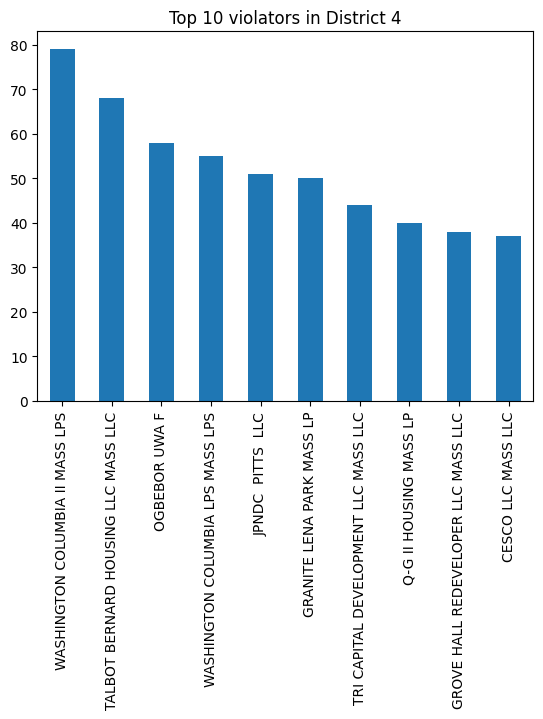

In [352]:
top_10_type_owners_d4.plot(kind='bar', title = 'Top 10 violators in District 4')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 4'}>

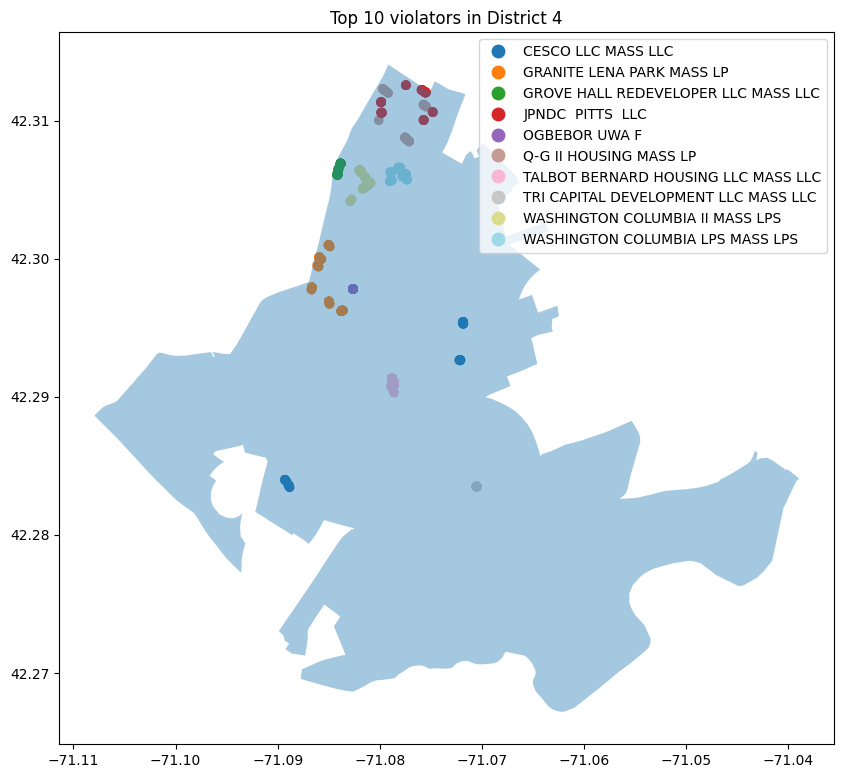

In [353]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_4_filtered_owners['longitude'], geo_district_4_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_4_own = gpd.GeoDataFrame(geo_district_4_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 4')

geo_district_4_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_4.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 4

In [354]:
geo_except_district_4_owners = geo_exclude_district_4[geo_exclude_district_4['owner'].isin(['WASHINGTON COLUMBIA II MASS LPS', 'TALBOT BERNARD HOUSING LLC MASS LLC', 
                                                                                            'OGBEBOR UWA F', 'WASHINGTON COLUMBIA LPS MASS LPS', 
                                                                                            'JPNDC  PITTS  LLC'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_4_owners

date      violation_type  \
5987        2022-09-26 15:46:00  Housing Complaints   
21431       2022-07-22 13:52:00  Housing Complaints   
25445       2022-06-23 08:57:00  Housing Complaints   
26634       2022-06-15 08:30:00  Housing Complaints   
27051       2022-06-13 10:47:00  Housing Complaints   
37994       2022-04-06 20:04:00  Housing Complaints   
40357       2022-03-22 15:05:00  Housing Complaints   
42839       2022-03-04 08:19:00  Housing Complaints   
43371       2022-03-01 10:03:00  Housing Complaints   
50283       2022-01-18 09:01:00  Housing Complaints   
63309       2021-10-24 10:10:00  Housing Complaints   
63928       2021-10-20 09:48:00  Housing Complaints   
68106       2021-09-29 11:51:00  Housing Complaints   
72819       2021-09-08 09:52:00  Housing Complaints   
76720       2021-08-30 15:11:00  Housing Complaints   
79900       2021-08-20 15:27:00  Housing Complaints   
82594    2021-08-09 10:15:14.14  Housing Complaints   
89405       2021-07-02 08:08:00  Housing Complaints   
89720       2021-06-30 13:13:00  Housing Complaints   
91880       2021-06-15 13:00:00  Housing Complaints   
101498      2021-04-12 11:38:00  Housing Complaints   
101793      2021-04-09 11:45:00  Housing Complaints   
126135  2020-10-20 08:31:17.637  Housing Complaints   
130707  2020-09-25 08:09:54.507  Housing Complaints   
148899      2020-07-07 11:37:00  Housing Complaints   
154980      2020-05-28 20:17:00  Housing Complaints   
165800  2020-02-19 08:50:32.123  Housing Complaints   
167133      2020-02-11 14:14:00  Housing Complaints   
167459   2020-02-10 08:09:49.69  Housing Complaints   
167884  2020-02-07 08:55:02.203  Housing Complaints   
168753      2020-02-03 08:39:00  Housing Complaints   
169104  2020-01-31 10:11:00.237  Housing Complaints   
169107  2020-01-31 10:04:06.233  Housing Complaints   
169108   2020-01-31 09:57:01.17  Housing Complaints   
169110  2020-01-31 09:47:16.737  Housing Complaints   
169686  2020-01-28 11:39:11.447  Housing Complaints   
173724      2020-01-06 12:51:00  Housing Complaints   
173725      2020-01-06 12:45:00  Housing Complaints   
174122      2020-01-02 15:28:00  Housing Complaints   
176374      2019-12-17 10:03:00  Housing Complaints   
176389      2019-12-17 08:46:00  Housing Complaints   
182432      2019-11-11 15:30:00  Housing Complaints   
202211  2019-08-09 11:01:52.563  Housing Complaints   
202215   2019-08-09 10:18:01.71  Housing Complaints   
203719      2019-08-01 13:15:00  Housing Complaints   
207679      2019-07-11 10:26:00  Housing Complaints   
212184      2019-06-14 10:56:00  Housing Complaints   
229618      2019-02-17 13:20:00  Housing Complaints   
242204      2018-11-24 02:23:00  Housing Complaints   
247432      2018-10-24 13:59:00  Housing Complaints   
267969      2018-07-10 17:48:00  Housing Complaints   
269084      2018-07-03 19:05:00  Housing Complaints   
274274  2018-06-06 14:39:41.017  Housing Complaints   
291565  2018-03-05 14:16:02.383  Housing Complaints   
296296      2018-02-06 13:37:00  Housing Complaints   

                                   description  \
5987          Unsatisfactory Living Conditions   
21431           Pest Infestation - Residential   
25445           Pest Infestation - Residential   
26634           Mice Infestation - Residential   
27051           Mice Infestation - Residential   
37994         Unsatisfactory Living Conditions   
40357      Maintenance Complaint - Residential   
42839         Unsatisfactory Living Conditions   
43371         Unsatisfactory Living Conditions   
50283         Unsatisfactory Living Conditions   
63309           Pest Infestation - Residential   
63928         Unsatisfactory Living Conditions   
68106         Unsatisfactory Living Conditions   
72819                    Contractors Complaint   
76720                    Chronic Dampness/Mold   
79900                    Chronic Dampness/Mold   
82594         Unsatisfactory Living Conditions   
89405         Unsatisfactory Living Conditions

In [355]:
violation_excluding_d4 = geo_except_district_4_owners['description'].value_counts()
violation_excluding_d4

Unsatisfactory Living Conditions          19
Rental Unit Delivery Conditions            8
Pest Infestation - Residential             5
Contractors Complaint                      5
Mice Infestation - Residential             3
Maintenance Complaint - Residential        3
Chronic Dampness/Mold                      3
Egress                                     2
Heat - Excessive, Insufficient             2
Protection of Adjoining Property           1
Exceeding Terms of Permit                  1
Unsafe Dangerous Conditions                1
No Utilities Residential - Electricity     1
Carbon Monoxide                            1
Name: description, dtype: int64

<AxesSubplot: title={'center': 'Violations in other districts from top D4 violators'}>

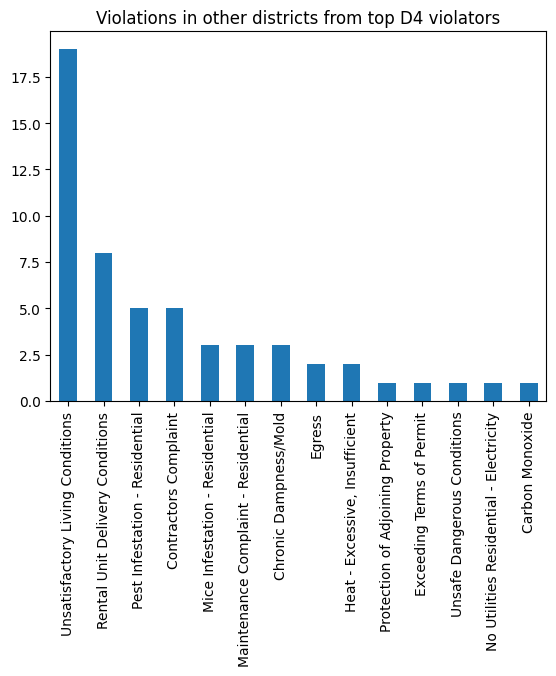

In [356]:
violation_excluding_d4.plot(kind='bar', title = 'Violations in other districts from top D4 violators')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Violations in other Districts from top District 4 violators '}>

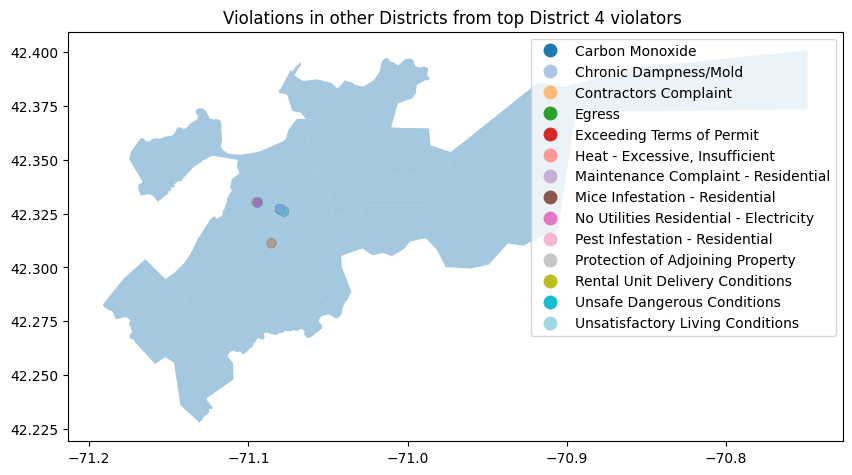

In [357]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_except_district_4_owners['longitude'], geo_except_district_4_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_except_4 = gpd.GeoDataFrame(geo_except_district_4_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Violations in other Districts from top District 4 violators ')

geo_district_except_4.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)

# District 5

### violation descriptions

In [358]:
top_10_type_violation_d5 = geo_district_5_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d5

Unsatisfactory Living Conditions    1103
Work w/out Permit                    598
Pest Infestation - Residential       408
Heat - Excessive, Insufficient       406
Building Inspection Request          379
Contractors Complaint                320
Unsafe Dangerous Conditions          301
Electrical                           234
Protection of Adjoining Property     226
Mice Infestation - Residential       188
Name: description, dtype: int64

In [359]:
#removing other descriptions
geo_district_5_filtered_violation = geo_district_5_filtered[geo_district_5_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Work w/out Permit',
    'Pest Infestation - Residential', 'Heat - Excessive, Insufficient',
    'Building Inspection Request', 'Contractors Complaint', 
    'Unsafe Dangerous Conditions', 'Electrical', 
    'Protection of Adjoining Property', 'Mice Infestation - Residential'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 5'}>

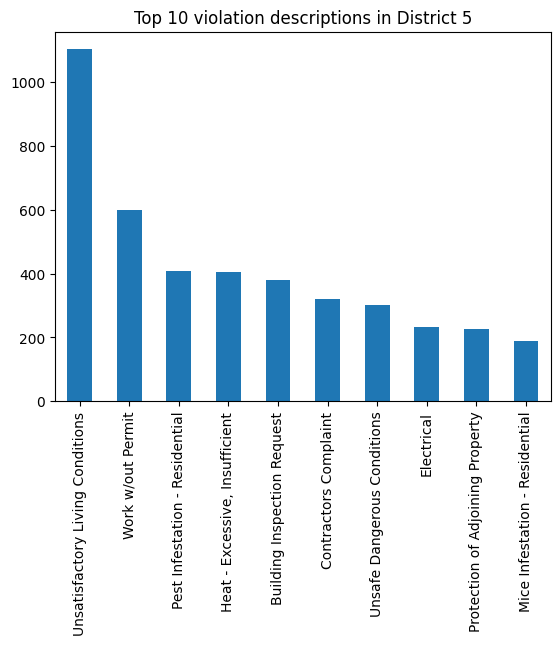

In [360]:
top_10_type_violation_d5.plot(kind='bar', title = 'Top 10 violation descriptions in District 5')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 5'}>

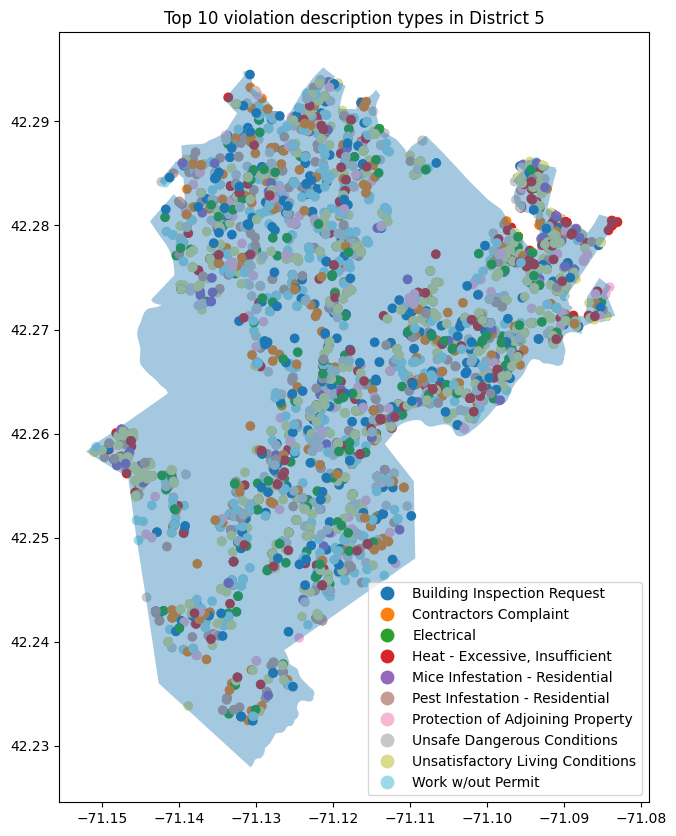

In [361]:
geometry = [Point(xy) for xy in zip(geo_district_5_filtered_violation['longitude'], geo_district_5_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_5 = gpd.GeoDataFrame(geo_district_5_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in District 5')

geo_district_5.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_5.plot(ax = ax, alpha = 0.4)

### owner analysis

In [362]:
top_10_type_owners_d5 = geo_district_5_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d5 

GBM PORTFOLIO OWNER LLC               326
GEORGETOWNE HOMES ONE LLC MASS LLC    102
BISMARCK STREET OWNER LLC              80
CESCO LLC MASS LLC                     48
FERREIRA JOSE                          48
GEORGETOWNE HOMES TWO LLC MASS LLC     47
HIGH POINT VILLAGE CO MASS LPS         44
NIU JIANGHE                            41
WILMINGTON TRUST NATIONAL              38
HELGE CUMMINS LLC                      33
Name: owner, dtype: int64

In [363]:
#removing other owners
geo_district_5_filtered_owners = geo_district_5_filtered[geo_district_5_filtered['owner'].isin([
    'GBM PORTFOLIO OWNER LLC', 'GEORGETOWNE HOMES ONE LLC MASS LLC', 
    'BISMARCK STREET OWNER LLC', 'CESCO LLC MASS LLC', 
    'FERREIRA JOSE', 'GEORGETOWNE HOMES TWO LLC MASS LLC', 
    'HIGH POINT VILLAGE CO MASS LPS', 'NIU JIANGHE', 
    'WILMINGTON TRUST NATIONAL', 'HELGE CUMMINS LLC'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 5'}>

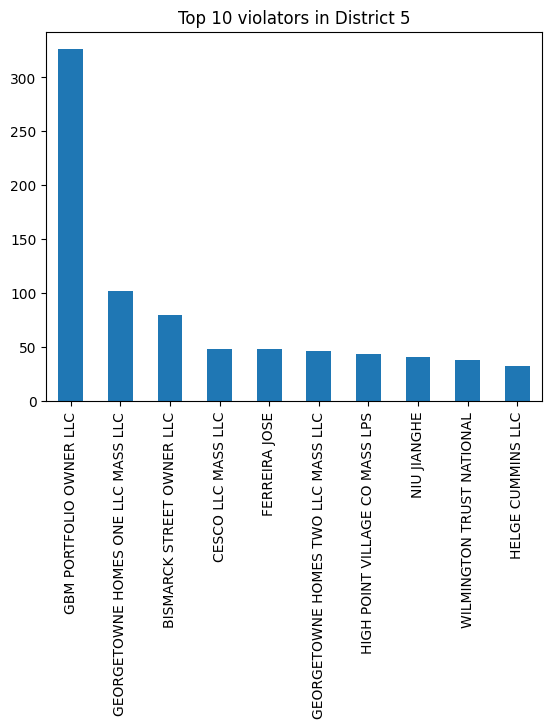

In [364]:
top_10_type_owners_d5.plot(kind='bar', title = 'Top 10 violators in District 5')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 5'}>

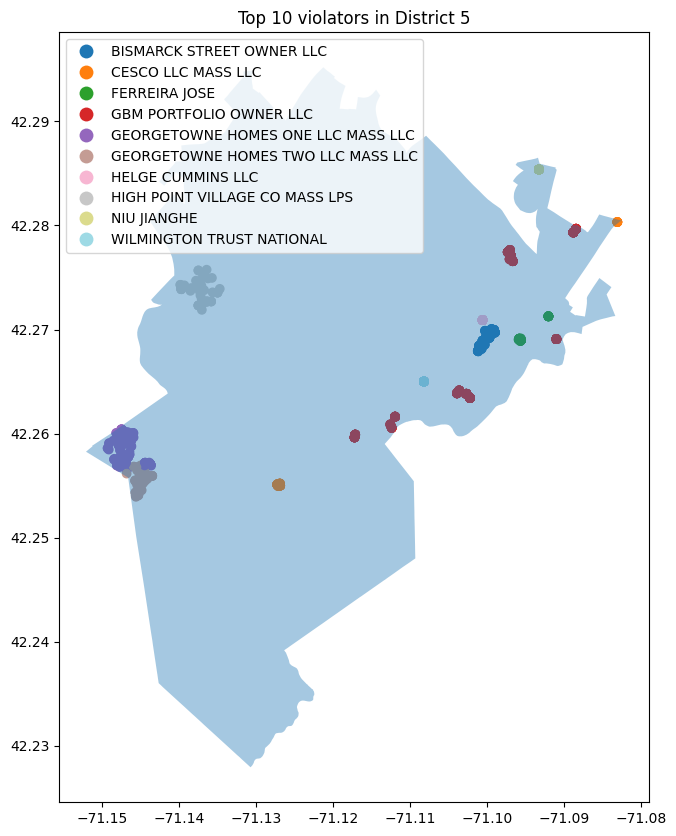

In [365]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_5_filtered_owners['longitude'], geo_district_5_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_5_own = gpd.GeoDataFrame(geo_district_5_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 5')

geo_district_5_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_5.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 5

In [366]:
geo_except_district_5_owners = geo_exclude_district_5[geo_exclude_district_5['owner'].isin(['GBM PORTFOLIO OWNER LLC', 'GEORGETOWNE HOMES ONE LLC MASS LLC', 
                                                                                            'BISMARCK STREET OWNER LLC', 'CESCO LLC MASS LLC', 
                                                                                            'FERREIRA JOSE'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_5_owners

date      violation_type  \
27617       2022-06-08 15:24:00  Housing Complaints   
28208       2022-06-05 13:09:00  Housing Complaints   
28209    2022-06-05 13:08:54.42  Housing Complaints   
28217   2022-06-05 01:28:01.713  Housing Complaints   
30575       2022-05-20 10:33:00  Housing Complaints   
...                         ...                 ...   
296259      2018-02-06 19:21:00  Housing Complaints   
296455      2018-02-05 14:12:00  Housing Complaints   
297604      2018-01-26 10:37:00  Housing Complaints   
301663      2018-01-02 09:16:00  Housing Complaints   
305261      2017-12-08 10:28:00  Housing Complaints   

                                            description  \
27617                  Unsatisfactory Living Conditions   
28208   Unsatisfactory Utilities - Electrical, Plumbing   
28209   Unsatisfactory Utilities - Electrical, Plumbing   
28217                                        Electrical   
30575                    Heat - Excessive, Insufficient   
...                                                 ...   
296259                   Heat - Excessive, Insufficient   
296455                 Unsatisfactory Living Conditions   
297604                                         Plumbing   
301663                   Heat - Excessive, Insufficient   
305261                 Unsatisfactory Living Conditions   

                          address neighborhood  zip_code      parcel  \
27617     40 Willis St #21, 02125   Dorchester      2125  1301796000   
28208     40 Willis St #21, 02125   Dorchester      2125  1301796000   
28209         40 Willis St, 02125   Dorchester      2125  1301796000   
28217     40 Willis St #21, 02125   Dorchester      2125  1301796000   
30575    247 Walnut Ave #6, 02119      Roxbury      2119  1101781000   
...                           ...          ...       ...         ...   
296259  247 Walnut Ave #10, 02119      Roxbury      2119  1101781000   
296455  6 Rosedale St # 2A, 02124   Dorchester      2124  1700627000   
297604   15 Ruggles St # 1, 02119      Roxbury      2119   902452000   
301663    750 Morton St #1, 02124   Dorchester      2124  1403417000   
305261       6 Rosedale St, 02124   Dorchester      2124  1700627000   

                          owner  year built  year remodeled  ...  \
27617        CESCO LLC MASS LLC      1936.0          1981.0  ...   
28208        CESCO LLC MASS LLC      1936.0          1981.0  ...   
28209        CESCO LLC MASS LLC      1936.0          1981.0  ...   
28217        CESCO LLC MASS LLC      1936.0          1981.0  ...   
30575   GBM PORTFOLIO OWNER LLC      1920.0             NaN  ...   
...                         ...         ...             ...  ...   
296259  GBM PORTFOLIO OWNER LLC      1920.0             NaN  ...   
296455       CESCO LLC MASS LLC      1925.0          1994.0  ...   
297604  GBM PORTFOLIO OWNER LLC      1899.0          2015.0  ...   
301663       CESCO LLC MASS LLC      1910.0          1978.0  ...   
305261       CESCO LLC MASS LLC      1925.0          1994.0  ...   

                          geometry  intersect district 1  \
27617   POINT (-71.06107 42.31808)                 False   
28208   POINT (-71.06107 42.31808)                 False   
28209   POINT (-71.06108 42.31809)                 False   
28217   POINT (-71.06107 42.31808)                 False   
30575   POINT (-71.09128 42.31813)                 False   
...                            ...                   ...   
296259  POINT (-71.09128 42.31813)                 False   
296455  POINT (-71.07216 42.29264)                 False   
297604  POINT (-71.08321 42.33162)                 False   
301663  POINT (-71.08929 42.28398)                 False   
305261  POINT (-71.07223 42.29264)                 False   

        intersect district 2 intersect district 3  intersect district 4  \
27617                  False                 True                 False   
28208                  False                 True                 False   
28209                  False 

In [367]:
violation_excluding_d5 = geo_except_district_5_owners['description'].value_counts()
violation_excluding_d5

Unsatisfactory Living Conditions                   39
Heat - Excessive, Insufficient                     32
Maintenance Complaint - Residential                 8
Unsafe Dangerous Conditions                         6
Mice Infestation - Residential                      5
Unsatisfactory Utilities - Electrical, Plumbing     4
Building Inspection Request                         3
Bed Bugs                                            3
Electrical                                          2
Illegal Occupancy                                   2
Pest Infestation - Residential                      2
Chronic Dampness/Mold                               1
Contractors Complaint                               1
Carbon Monoxide                                     1
Plumbing                                            1
Name: description, dtype: int64

<AxesSubplot: title={'center': 'Violations in other districts from top D5 violators'}>

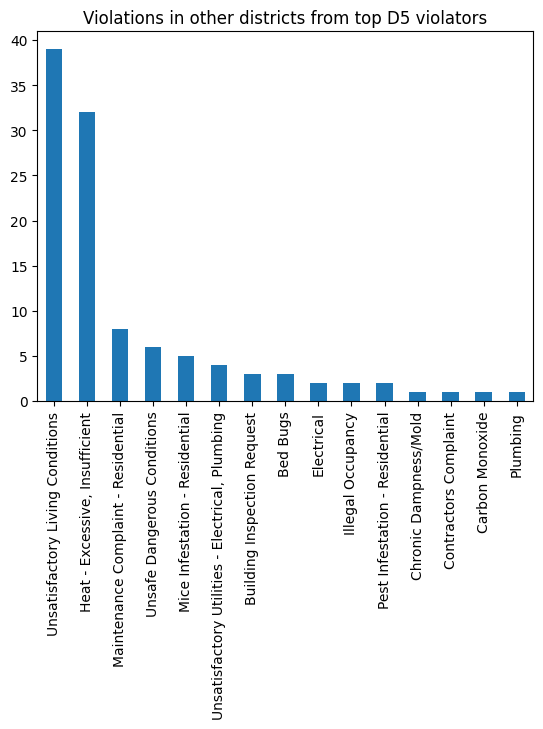

In [368]:
violation_excluding_d5.plot(kind='bar', title = 'Violations in other districts from top D5 violators')

In [369]:
violators_excluding_d5 = geo_except_district_5_owners['owner'].value_counts()
violators_excluding_d5

CESCO LLC MASS LLC         56
GBM PORTFOLIO OWNER LLC    44
FERREIRA JOSE              10
Name: owner, dtype: int64

<AxesSubplot: title={'center': 'Violations in other districts from top D5 violators'}>

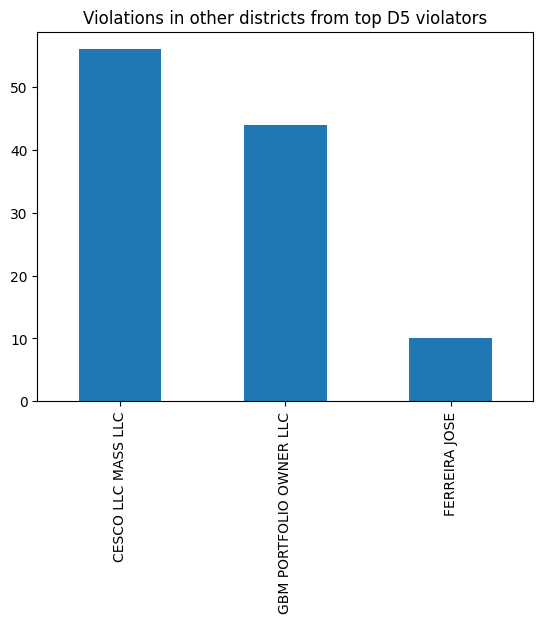

In [370]:
violators_excluding_d5.plot(kind='bar', title = 'Violations in other districts from top D5 violators')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Violations in other Districts from top District 5 violators '}>

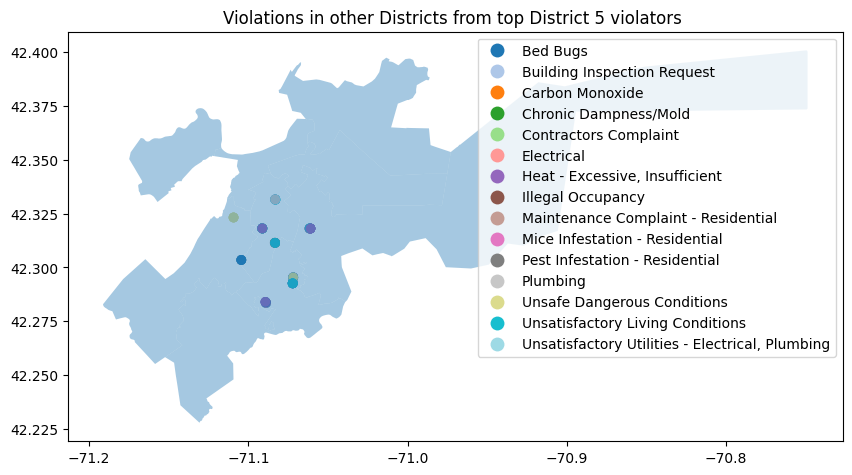

In [371]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_except_district_5_owners['longitude'], geo_except_district_5_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_except_5 = gpd.GeoDataFrame(geo_except_district_5_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Violations in other Districts from top District 5 violators ')

geo_district_except_5.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Violations in other Districts from top District 5 violators '}>

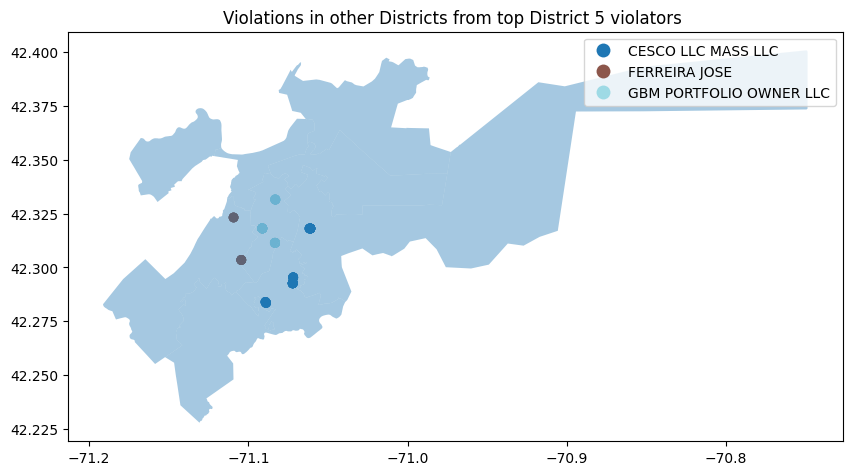

In [372]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_except_district_5_owners['longitude'], geo_except_district_5_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_except_5_owner = gpd.GeoDataFrame(geo_except_district_5_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Violations in other Districts from top District 5 violators ')

geo_district_except_5_owner.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)

# District 6

### violation descriptions 

In [373]:
top_10_type_violation_d6 = geo_district_6_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d6

Unsatisfactory Living Conditions    687
Contractors Complaint               517
Work w/out Permit                   517
Building Inspection Request         401
Unsafe Dangerous Conditions         328
Pest Infestation - Residential      303
Heat - Excessive, Insufficient      271
Working Beyond Hours                270
Protection of Adjoining Property    208
Electrical                          186
Name: description, dtype: int64

In [374]:
#removing other descriptions
geo_district_6_filtered_violation = geo_district_6_filtered[geo_district_6_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Contractors Complaint', 
    'Work w/out Permit', 'Building Inspection Request',
    'Unsafe Dangerous Conditions', 'Pest Infestation - Residential',
    'Heat - Excessive, Insufficient', 'Working Beyond Hours',
     'Protection of Adjoining Property', 'Electrical'])]

<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 6'}>

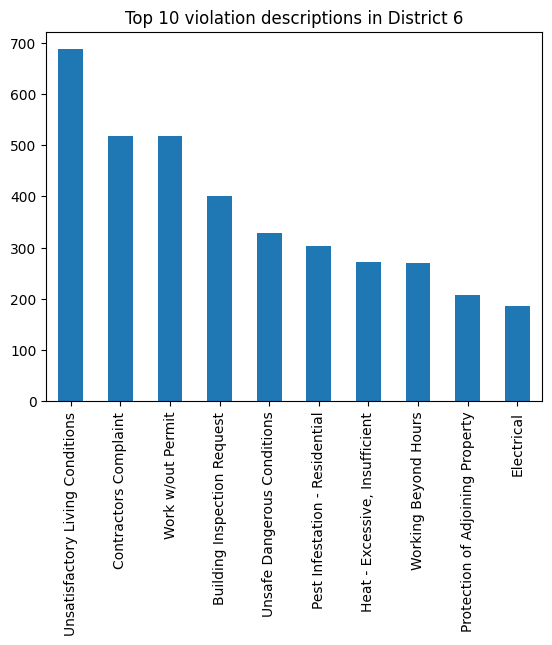

In [375]:
top_10_type_violation_d6.plot(kind='bar', title = 'Top 10 violation descriptions in District 6')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 6'}>

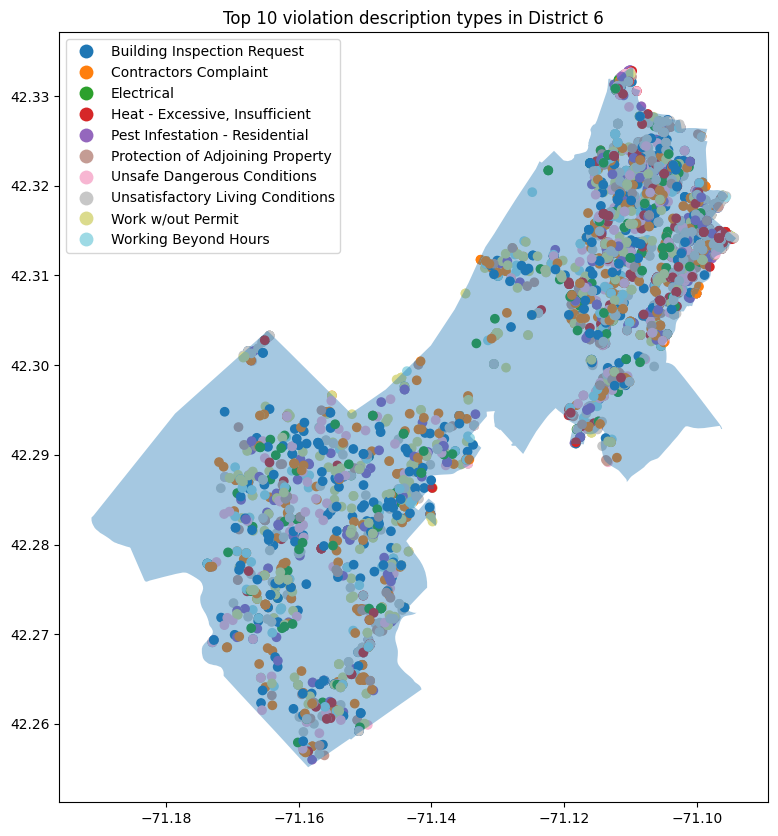

In [376]:
geometry = [Point(xy) for xy in zip(geo_district_6_filtered_violation['longitude'], geo_district_6_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_6 = gpd.GeoDataFrame(geo_district_6_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in District 6')

geo_district_6.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_6.plot(ax = ax, alpha = 0.4)

### owner analysis

In [377]:
top_10_type_owners_d6 = geo_district_6_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d6 

FORESTVALE APARTMENTS LP MASS LP    60
UNION-GREEN REALTY LLC MASS LLC     57
STONY BROOK CONDOMINIUM TR          56
UE APARTMENTS LLC                   34
BC ROCKINGHAM GLEN LLC              29
BROADLAWN PK CONDOMINIUM TR         28
SOUTH STREET LJS LLC MASS LLC       26
J P HOUSING LP                      26
HORIZON DEVELOPMENT LLC             26
BRACKETT KRISTINE TS                25
Name: owner, dtype: int64

In [378]:
#removing other owners
geo_district_6_filtered_owners = geo_district_6_filtered[geo_district_6_filtered['owner'].isin([
    'FORESTVALE APARTMENTS LP MASS LP', 'UNION-GREEN REALTY LLC MASS LLC', 
    'STONY BROOK CONDOMINIUM TR', 'UE APARTMENTS LLC', 
    'BC ROCKINGHAM GLEN LLC', 'BROADLAWN PK CONDOMINIUM TR', 
    'SOUTH STREET LJS LLC MASS LLC', 'J P HOUSING LP', 
    'HORIZON DEVELOPMENT LLC', 'BRACKETT KRISTINE TS'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 6'}>

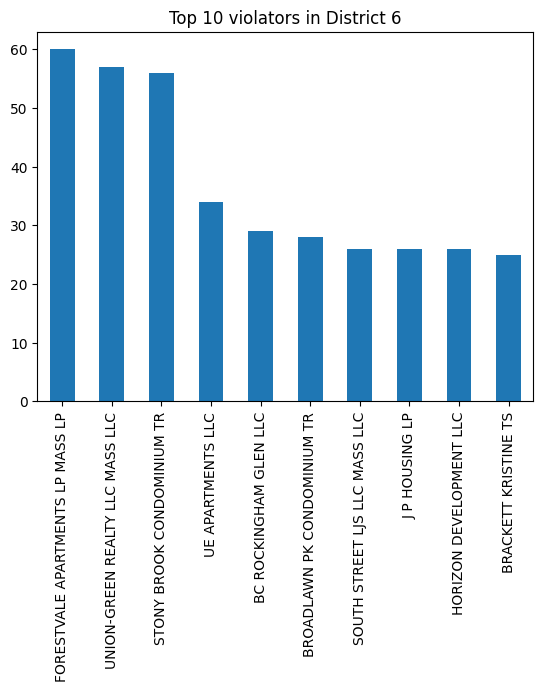

In [379]:
top_10_type_owners_d6.plot(kind='bar', title = 'Top 10 violators in District 6')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 6'}>

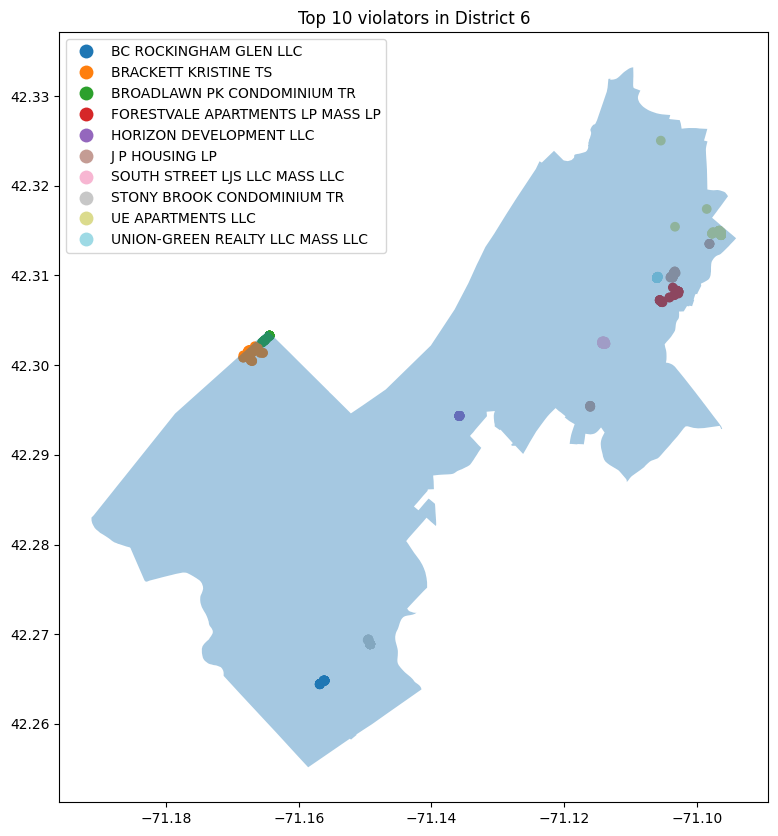

In [380]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_6_filtered_owners['longitude'], geo_district_6_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_6_own = gpd.GeoDataFrame(geo_district_6_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 6')

geo_district_6_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_6.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 6

In [381]:
geo_except_district_6_owners = geo_exclude_district_6[geo_exclude_district_6['owner'].isin(['FORESTVALE APARTMENTS LP MASS LP', 'UNION-GREEN REALTY LLC MASS LLC', 
                                                                                            'STONY BROOK CONDOMINIUM TR', 'UE APARTMENTS LLC', 
                                                                                            'BC ROCKINGHAM GLEN LLC'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_6_owners

date      violation_type  \
108279  2021-02-24 10:41:00  Housing Complaints   
114372  2021-01-15 12:40:00  Housing Complaints   
152265  2020-06-15 12:48:00  Housing Complaints   
176966  2019-12-13 15:20:00  Housing Complaints   
180418  2019-11-23 07:20:00  Housing Complaints   
183105  2019-11-06 10:29:00  Housing Complaints   
186788  2019-10-17 14:08:00  Housing Complaints   
199755  2019-08-22 11:24:00  Housing Complaints   
288554  2018-03-21 14:31:00  Housing Complaints   

                             description                  address  \
108279    Heat - Excessive, Insufficient  60 Seaver St # 4, 02121   
114372    Heat - Excessive, Insufficient  60 Seaver St # 4, 02121   
152265             Chronic Dampness/Mold      60 Seaver St, 02121   
176966    Heat - Excessive, Insufficient  60 Seaver St # 4, 02121   
180418       Building Inspection Request  60 Seaver St # 6, 02121   
183105    Heat - Excessive, Insufficient  60 Seaver St # 4, 02121   
186788  Unsatisfactory Living Conditions  60 Seaver St # 2, 02121   
199755  Unsatisfactory Living Conditions      60 Seaver St, 02121   
288554  Unsatisfactory Living Conditions  60 Seaver St # 2, 02121   

       neighborhood  zip_code      parcel              owner  year built  \
108279   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
114372   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
152265   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
176966   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
180418   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
183105   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
186788   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
199755   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
288554   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   

        year remodeled  ...                    geometry  intersect district 1  \
108279          2011.0  ...  POINT (-71.09312 42.31167)                 False   
114372          2011.0  ...  POINT (-71.09312 42.31167)                 False   
152265          2011.0  ...  POINT (-71.09312 42.31167)                 False   
176966          2011.0  ...  POINT (-71.09312 42.31167)                 False   
180418          2011.0  ...  POINT (-71.09312 42.31167)                 False   
183105          2011.0  ...  POINT (-71.09312 42.31167)                 False   
186788          2011.0  ...  POINT (-71.09312 42.31167)                 False   
199755          2011.0  ...  POINT (-71.09312 42.31167)                 False   
288554          2011.0  ...  POINT (-71.09312 42.31167)                 False   

        intersect district 2 intersect district 3  intersect district 4  \
108279                 False                False                 False   
114372                 False                False                 False   
152265                 False                False                 False   
176966                 False                False                 False   
180418                 False                False                 False   
183105                 False                False                 False   
186788                 False                False                 False   
199755                 False                False                 False   
288554                 False                False                 False   

        intersect district 5  intersect district 6  intersect district 7  \
108279                 False                 False                  True   
114372                 False                 False                  True   
152265                 False                 False                  True   
176966                 False                 False                  True   
180418                 False                 False                  True   
183105                 False              

In [382]:
#violations of the top 5 owners from d1 in other districts
violation_excluding_d6 = geo_except_district_6_owners['description'].value_counts()
violation_excluding_d6


Heat - Excessive, Insufficient      4
Unsatisfactory Living Conditions    3
Chronic Dampness/Mold               1
Building Inspection Request         1
Name: description, dtype: int64

<AxesSubplot: title={'center': 'Violations in other districts from top D1 violators'}>

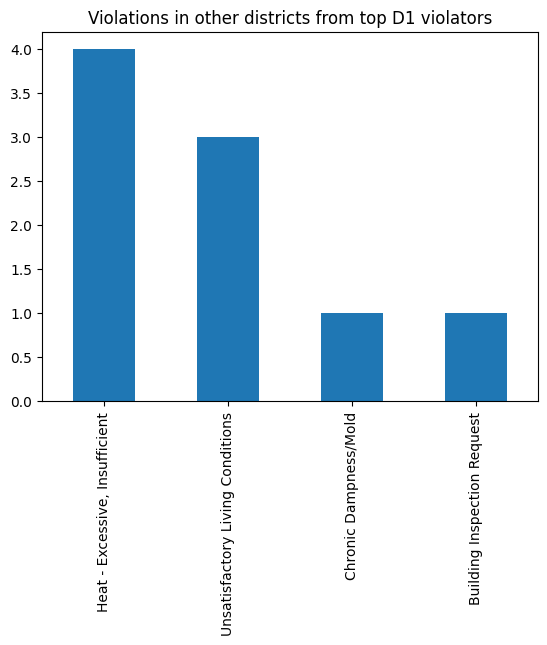

In [383]:
violation_excluding_d6.plot(kind='bar', title = 'Violations in other districts from top D1 violators')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Violations in other Districts from top District 6 violators '}>

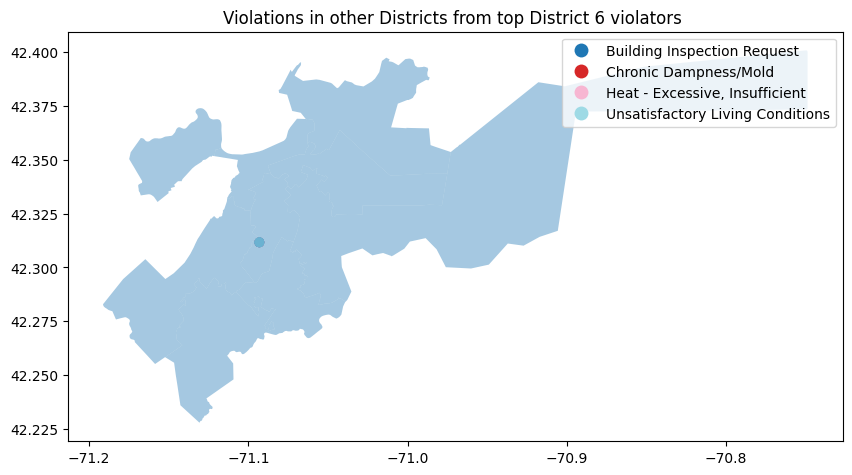

In [384]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_except_district_6_owners['longitude'], geo_except_district_6_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_except_6 = gpd.GeoDataFrame(geo_except_district_6_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Violations in other Districts from top District 6 violators ')

geo_district_except_6.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)

# District 7
### violation descriptions

In [385]:
top_10_type_violation_d7 = geo_district_7_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d7

Unsatisfactory Living Conditions       1661
Heat - Excessive, Insufficient          609
Pest Infestation - Residential          541
Work w/out Permit                       445
Contractors Complaint                   441
Building Inspection Request             320
Unsafe Dangerous Conditions             312
Mice Infestation - Residential          306
Maintenance Complaint - Residential     222
Working Beyond Hours                    207
Name: description, dtype: int64

In [386]:
#removing other descriptions
geo_district_7_filtered_violation = geo_district_7_filtered[geo_district_7_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Heat - Excessive, Insufficient',
    'Pest Infestation - Residential', 'Work w/out Permit',
    'Contractors Complaint', 'Building Inspection Request',
    'Unsafe Dangerous Conditions', 'Mice Infestation - Residential', 
    'Maintenance Complaint - Residential', 'Working Beyond Hours'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 7'}>

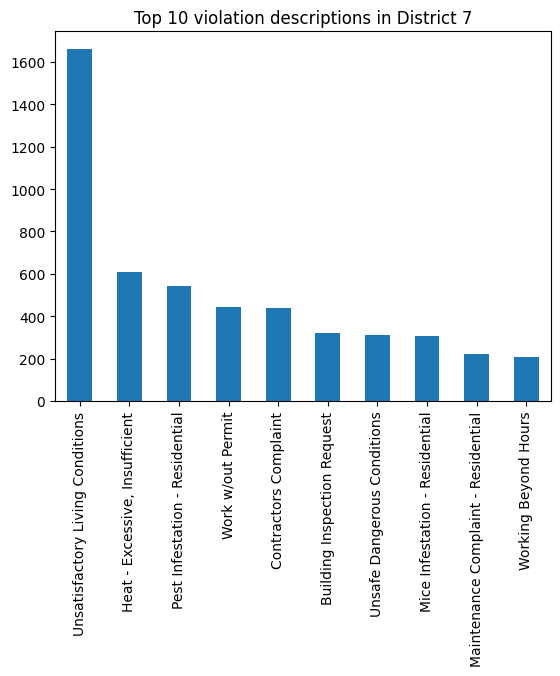

In [387]:
top_10_type_violation_d7.plot(kind='bar', title = 'Top 10 violation descriptions in District 7')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 7'}>

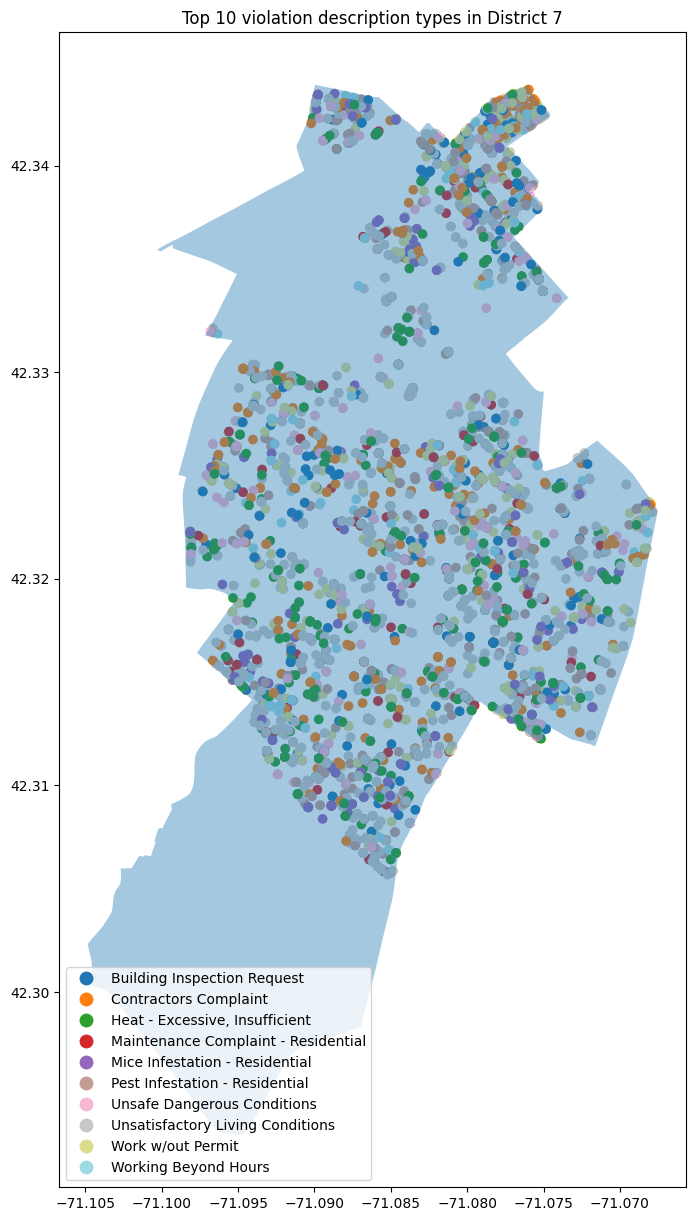

In [388]:
geometry = [Point(xy) for xy in zip(geo_district_7_filtered_violation['longitude'], geo_district_7_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_7 = gpd.GeoDataFrame(geo_district_7_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (15,15))

ax.set_title('Top 10 violation description types in District 7')

geo_district_7.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_7.plot(ax = ax, alpha = 0.4)

### owner analysis

In [389]:
top_10_type_owners_d7 = geo_district_7_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d7 

NORTHAMPTON SQ CONDO ASSOC             167
KASANOF LAND LLC                       146
PNC ARHPF BLUE MOUNTAIN APTS LLC        73
LACONCHA LIMITED PARTNERSHIP            72
DARTMOUTH HOTEL LP                      65
RIVIERA CONDOMINIUM ASSN                62
MILLER DWIGHT                           62
PNC ARHPF NEW PORT ANTONIO APTS LLC     59
PHILLIPS BROOKS SCHOOL                  58
JPNDC  PITTS  LLC                       55
Name: owner, dtype: int64

In [390]:
#removing other owners
geo_district_7_filtered_owners = geo_district_7_filtered[geo_district_7_filtered['owner'].isin([
    'NORTHAMPTON SQ CONDO ASSOC', 'KASANOF LAND LLC', 
    'PNC ARHPF BLUE MOUNTAIN APTS LLC', 'LACONCHA LIMITED PARTNERSHIP', 
    'DARTMOUTH HOTEL LP', 'RIVIERA CONDOMINIUM ASSN', 
    'MILLER DWIGHT', 'PNC ARHPF NEW PORT ANTONIO APTS LLC', 
    'PHILLIPS BROOKS SCHOOL', 'JPNDC  PITTS  LLC'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 7'}>

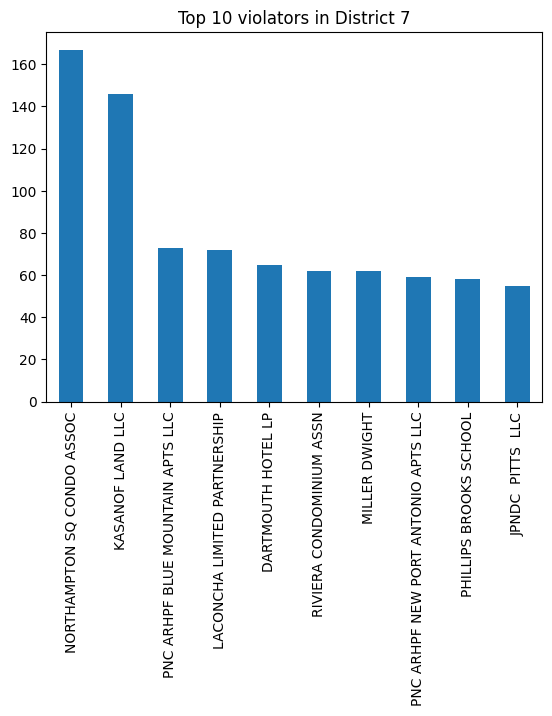

In [391]:
top_10_type_owners_d7.plot(kind='bar', title = 'Top 10 violators in District 7')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 7'}>

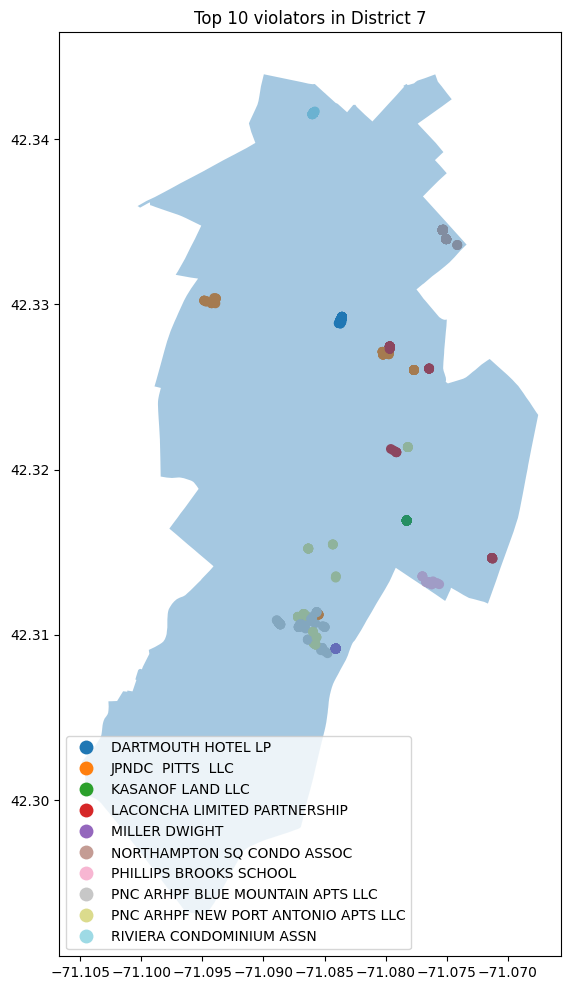

In [392]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_7_filtered_owners['longitude'], geo_district_7_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_7_own = gpd.GeoDataFrame(geo_district_7_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (12,12))

ax.set_title('Top 10 violators in District 7')

geo_district_7_own.plot(ax = ax, column = 'owner' , legend=True, cmap ='tab20' )

shape_7.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 7

In [393]:
geo_except_district_7_owners = geo_exclude_district_7[geo_exclude_district_7['owner'].isin(['NORTHAMPTON SQ CONDO ASSOC', 'KASANOF LAND LLC', 
                                                                                            'PNC ARHPF BLUE MOUNTAIN APTS LLC', 'LACONCHA LIMITED PARTNERSHIP', 
                                                                                            'DARTMOUTH HOTEL LP'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_7_owners

Empty GeoDataFrame
Columns: [date, violation_type, description, address, neighborhood, zip_code, parcel, owner, year built, year remodeled, property_type, latitude, longitude, geometry, intersect district 1, intersect district 2, intersect district 3, intersect district 4, intersect district 5, intersect district 6, intersect district 7, intersect district 8, intersect district 9]
Index: []

[0 rows x 23 columns]

the owners do not have properties in other districts

# District 8
### violation descriptions

In [394]:
top_10_type_violation_d8 = geo_district_8_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d8

Unsatisfactory Living Conditions    642
Contractors Complaint               586
Work w/out Permit                   465
Building Inspection Request         355
Working Beyond Hours                342
Heat - Excessive, Insufficient      339
Unsafe Dangerous Conditions         320
Pest Infestation - Residential      318
Electrical                          214
Maintenance - Homeowner             140
Name: description, dtype: int64

In [395]:
#removing other descriptions
geo_district_8_filtered_violation = geo_district_8_filtered[geo_district_8_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Contractors Complaint',
    'Work w/out Permit', 'Building Inspection Request',
    'Working Beyond Hours', 'Heat - Excessive, Insufficient',
    'Unsafe Dangerous Conditions', 'Pest Infestation - Residential',
    'Electrical', 'Maintenance - Homeowner'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 8'}>

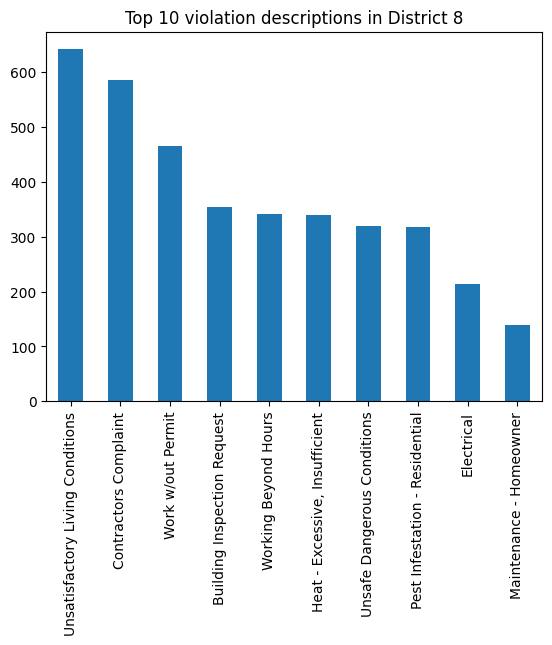

In [396]:
top_10_type_violation_d8.plot(kind='bar', title = 'Top 10 violation descriptions in District 8')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 8'}>

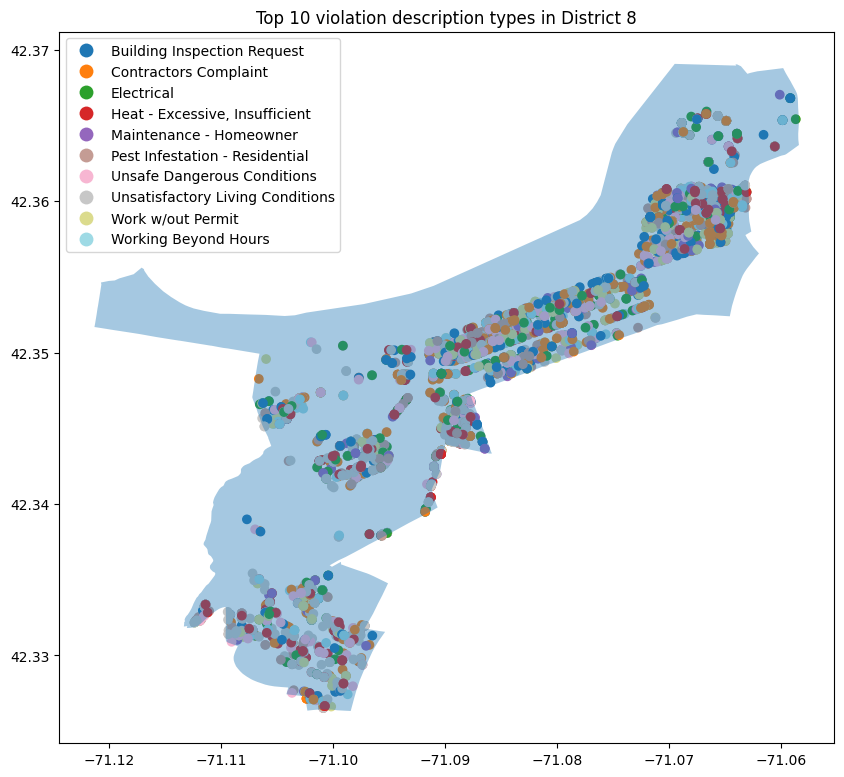

In [397]:
geometry = [Point(xy) for xy in zip(geo_district_8_filtered_violation['longitude'], geo_district_8_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_8 = gpd.GeoDataFrame(geo_district_8_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in District 8')

geo_district_8.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_8.plot(ax = ax, alpha = 0.4)

### owner analysis

In [398]:
top_10_type_owners_d8 = geo_district_8_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d8 

CHARLES RIVER PARK D COMPANY           65
LDJ DEVELOPMENT LLC                    53
BURBANK GARDENS APARTMENTS   LLC       49
HEMENWAY CONDOMINIUM TR                47
ERP OPERATING LP                       44
JHB MASSACHUSETTS PROP LLC MASS LLC    41
HEMENWAY PARK DRIVE LLC DEL LLC        36
PETERBOROUGH HOUSING                   36
29 WEST CEDAR LLC                      34
HEMENWAY APARTMENTS COMPANY            34
Name: owner, dtype: int64

In [399]:
#removing other owners
geo_district_8_filtered_owners = geo_district_8_filtered[geo_district_8_filtered['owner'].isin([
    'CHARLES RIVER PARK D COMPANY', 'LDJ DEVELOPMENT LLC', 
    'BURBANK GARDENS APARTMENTS   LLC', 'HEMENWAY CONDOMINIUM TR', 
    'ERP OPERATING LP', 'JHB MASSACHUSETTS PROP LLC MASS LLC', 
    'HEMENWAY PARK DRIVE LLC DEL LLC', 'PETERBOROUGH HOUSING', 
    '29 WEST CEDAR LLC', 'HEMENWAY APARTMENTS COMPANY'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 8'}>

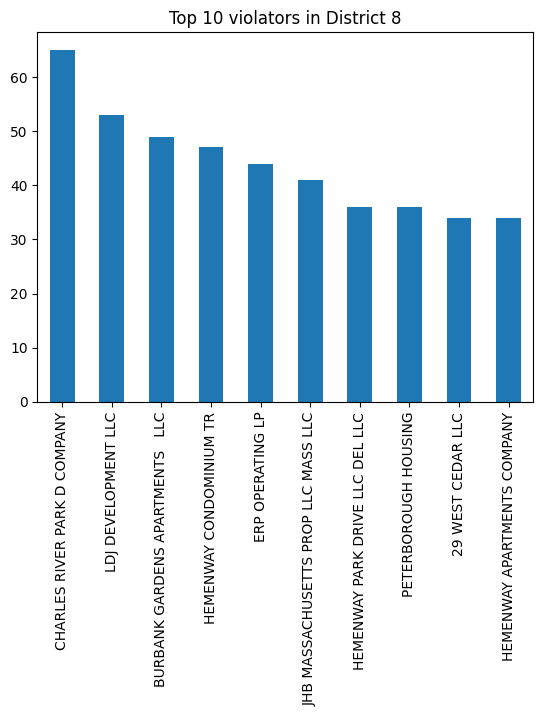

In [400]:
top_10_type_owners_d8.plot(kind='bar', title = 'Top 10 violators in District 8')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 8'}>

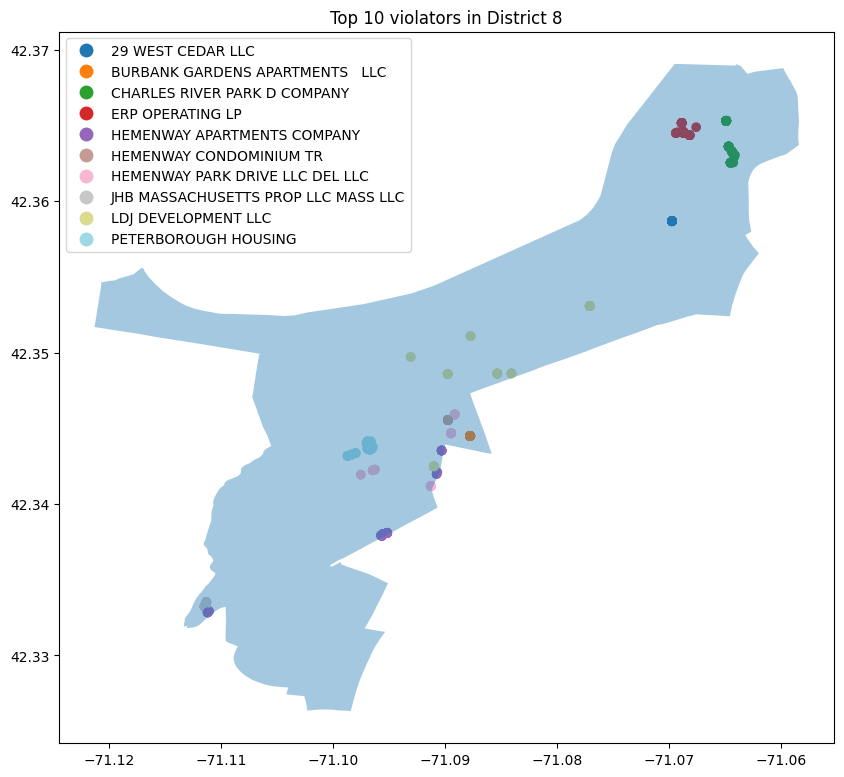

In [401]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_8_filtered_owners['longitude'], geo_district_8_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_8_own = gpd.GeoDataFrame(geo_district_8_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 8')

geo_district_8_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_8.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 8

In [402]:
geo_except_district_8_owners = geo_exclude_district_8[geo_exclude_district_8['owner'].isin(['CHARLES RIVER PARK D COMPANY', 'LDJ DEVELOPMENT LLC', 
                                                                                            'BURBANK GARDENS APARTMENTS   LLC', 'HEMENWAY CONDOMINIUM TR', 
                                                                                            'ERP OPERATING LP'])]         

geo_except_district_8_owners

Empty GeoDataFrame
Columns: [date, violation_type, description, address, neighborhood, zip_code, parcel, owner, year built, year remodeled, property_type, latitude, longitude, geometry, intersect district 1, intersect district 2, intersect district 3, intersect district 4, intersect district 5, intersect district 6, intersect district 7, intersect district 8, intersect district 9]
Index: []

[0 rows x 23 columns]

# District 9
### violation descriptions

In [403]:
top_10_type_violation_d9 = geo_district_9_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d9

Unsatisfactory Living Conditions    813
Pest Infestation - Residential      654
Heat - Excessive, Insufficient      469
Work w/out Permit                   371
Building Inspection Request         301
Contractors Complaint               268
Unsafe Dangerous Conditions         187
Working Beyond Hours                186
Electrical                          165
Mice Infestation - Residential      115
Name: description, dtype: int64

In [404]:
#removing other descriptions
geo_district_9_filtered_violation = geo_district_9_filtered[geo_district_9_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Pest Infestation - Residential',
    'Heat - Excessive, Insufficient', 'Work w/out Permit',
    'Building Inspection Request', 'Contractors Complaint',
    'Unsafe Dangerous Conditions', 'Working Beyond Hours',
    'Electrical', 'Mice Infestation - Residential'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 9'}>

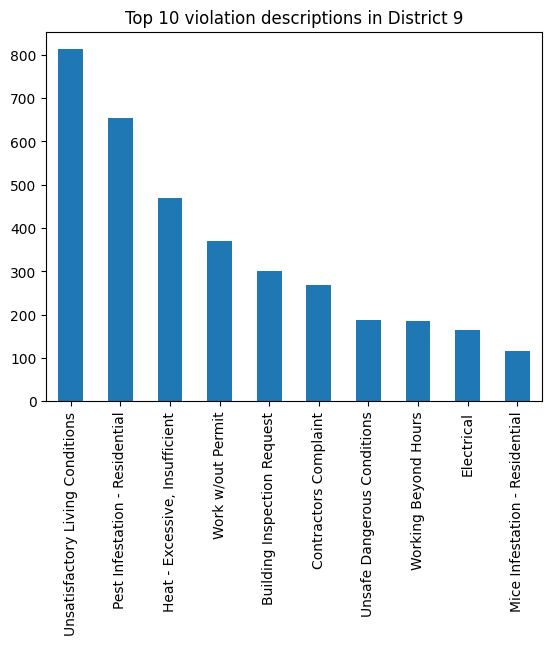

In [405]:
top_10_type_violation_d9.plot(kind='bar', title = 'Top 10 violation descriptions in District 9')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 9'}>

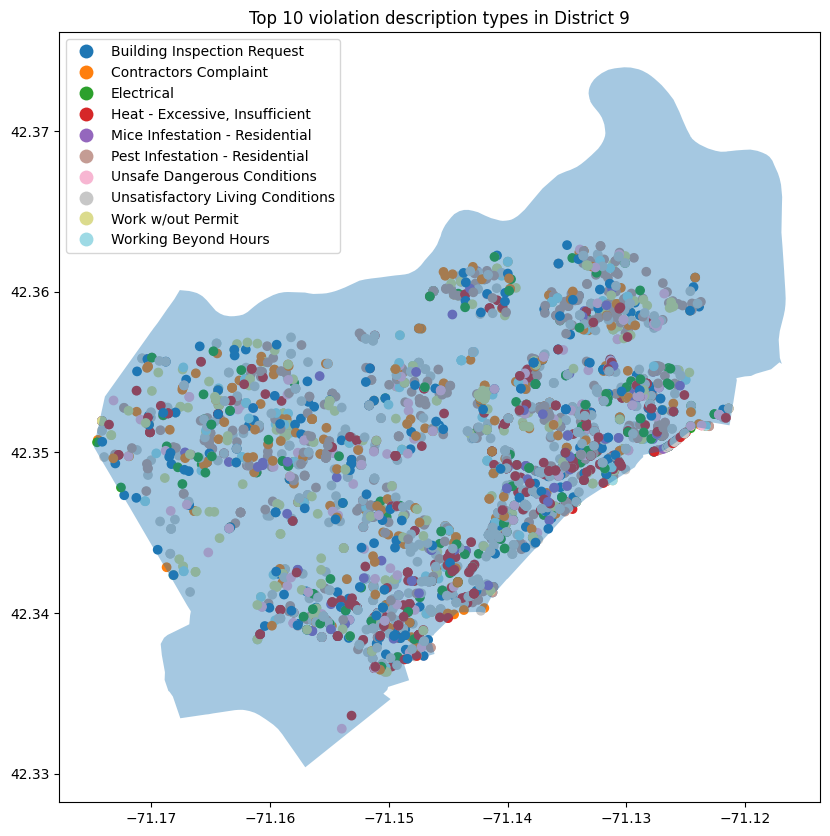

In [406]:
geometry = [Point(xy) for xy in zip(geo_district_9_filtered_violation['longitude'], geo_district_9_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_9 = gpd.GeoDataFrame(geo_district_9_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in District 9')

geo_district_9.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_9.plot(ax = ax, alpha = 0.4)

### owner analysis

In [407]:
top_10_type_owners_d9 = geo_district_9_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d9

NORTHGATE CONDO TRUST            46
COMAVEN HOUSING ASSOC LPS        44
COMMONWEALTH PROPERTIES          40
CUMMINGS ROAD LLC MASS LLC       40
LONG-GLEN RENTAL LLC MASS LLC    38
RESERVOIR PLACE CONDO TR         33
COMMGLEN LLC                     33
LEO BIRMINGHAM NOMINEE TRUST     27
LONGFELLOW MANOR CONDO TR        25
WASHOW LPS MASS LPS              24
Name: owner, dtype: int64

In [408]:
#removing other owners
geo_district_9_filtered_owners = geo_district_9_filtered[geo_district_9_filtered['owner'].isin([
    'NORTHGATE CONDO TRUST', 'COMAVEN HOUSING ASSOC LPS', 
    'COMMONWEALTH PROPERTIES', 'CUMMINGS ROAD LLC MASS LLC', 
    'LONG-GLEN RENTAL LLC MASS LLC ', 'RESERVOIR PLACE CONDO TR', 
    'COMMGLEN LLC', 'LEO BIRMINGHAM NOMINEE TRUST', 
    'LONGFELLOW MANOR CONDO TR', 'WASHOW LPS MASS LPS'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 9'}>

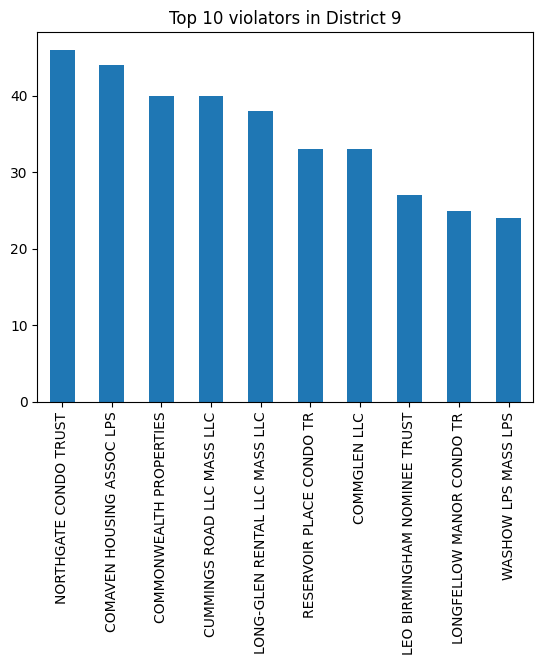

In [409]:
top_10_type_owners_d9.plot(kind='bar', title = 'Top 10 violators in District 9')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 9'}>

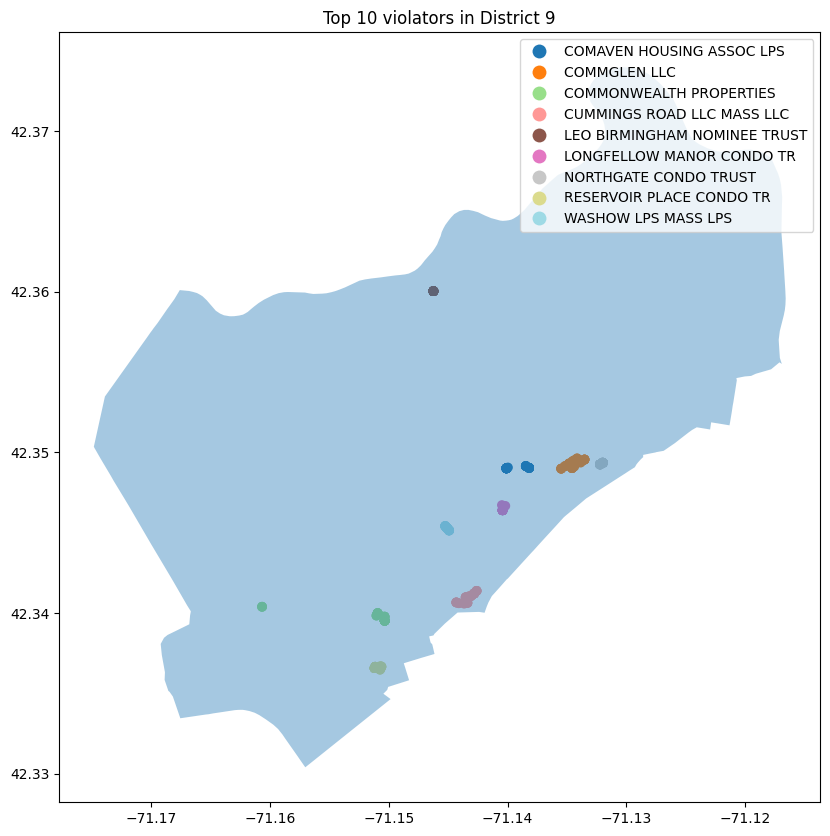

In [410]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_9_filtered_owners['longitude'], geo_district_9_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_9_own = gpd.GeoDataFrame(geo_district_9_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 9')

geo_district_9_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_9.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 9

In [411]:
geo_except_district_9_owners = geo_exclude_district_9[geo_exclude_district_9['owner'].isin(['NORTHGATE CONDO TRUST', 'COMAVEN HOUSING ASSOC LPS', 
                                                                                            'COMMONWEALTH PROPERTIES', 'CUMMINGS ROAD LLC MASS LLC', 
                                                                                            'LONG-GLEN RENTAL LLC MASS LLC '])]


geo_except_district_9_owners

Empty GeoDataFrame
Columns: [date, violation_type, description, address, neighborhood, zip_code, parcel, owner, year built, year remodeled, property_type, latitude, longitude, geometry, intersect district 1, intersect district 2, intersect district 3, intersect district 4, intersect district 5, intersect district 6, intersect district 7, intersect district 8, intersect district 9]
Index: []

[0 rows x 23 columns]

the owners do not have properties in other districts

# Overall Summary

In [412]:
top_10_type_violation_all = geo_all['description'].value_counts().nlargest(10)
top_10_type_violation_all

Unsatisfactory Living Conditions    8901
Work w/out Permit                   5848
Contractors Complaint               5114
Pest Infestation - Residential      4226
Heat - Excessive, Insufficient      3592
Building Inspection Request         3503
Unsafe Dangerous Conditions         3138
Working Beyond Hours                2859
Electrical                          1749
Protection of Adjoining Property    1579
Name: description, dtype: int64

In [413]:
#filtering out 
geo_all_filtered_violation = geo_all[geo_all['description'].isin(
    ['Unsatisfactory Living Conditions', 'Work w/out Permit', 
     'Contractors Complaint','Pest Infestation - Residential', 
     'Heat - Excessive, Insufficient', 'Building Inspection Request'
     'Unsafe Dangerous Conditions', 'Working Beyond Hours',
     'Electrical','Protection of Adjoining Property'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in Boston'}>

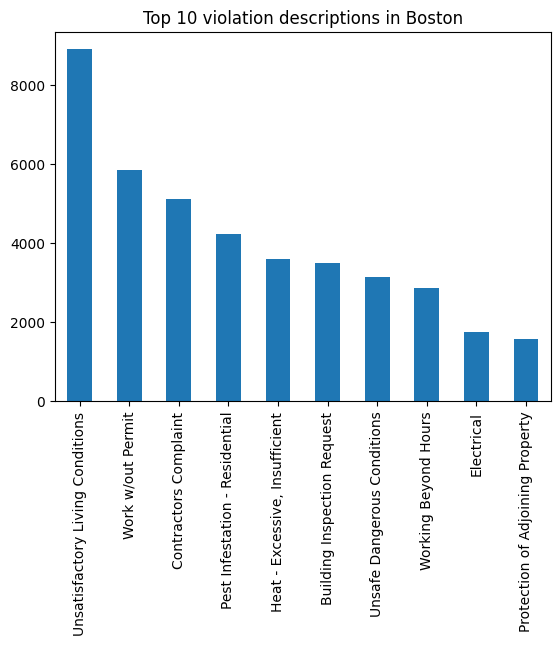

In [414]:
top_10_type_violation_all.plot(kind='bar', title = 'Top 10 violation descriptions in Boston')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in Boston'}>

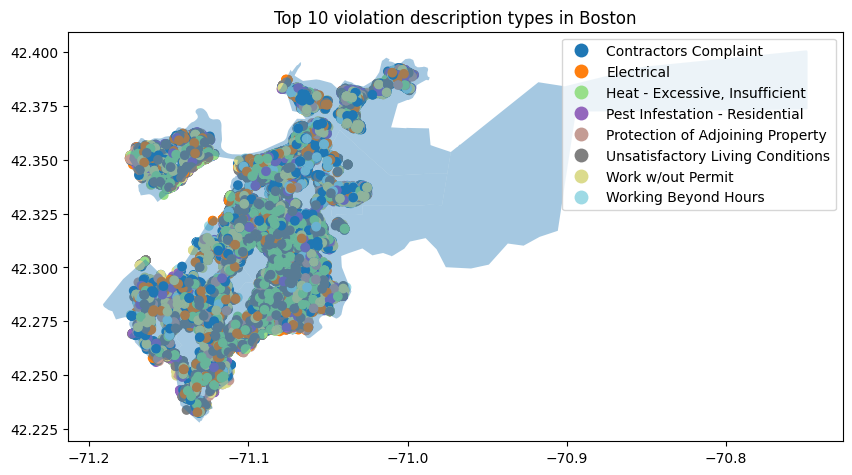

In [415]:
geometry = [Point(xy) for xy in zip(geo_all_filtered_violation['longitude'], geo_all_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_all_districts_violations = gpd.GeoDataFrame(geo_all_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in Boston')

geo_all_districts_violations.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shap.plot(ax = ax, alpha = 0.4)

In [416]:
top_10_type_owners_all = geo_all['owner'].value_counts().nlargest(10)
top_10_type_owners_all

GBM PORTFOLIO OWNER LLC               370
NORTHAMPTON SQ CONDO ASSOC            167
KASANOF LAND LLC                      146
JPNDC  PITTS  LLC                     106
CESCO LLC MASS LLC                    104
GEORGETOWNE HOMES ONE LLC MASS LLC    102
SOLSKINN PROPERTIES LLC                96
HARBOR POINT APTS CO LESSEE            83
MERCANTILE WHARF ASSOCIATES            81
BISMARCK STREET OWNER LLC              80
Name: owner, dtype: int64

In [417]:
#filtering out 
geo_all_filtered_owner = geo_all[geo_all['owner'].isin(
    ['GBM PORTFOLIO OWNER LLC', 'NORTHAMPTON SQ CONDO ASSOC', 
     'KASANOF LAND LLC','JPNDC  PITTS  LLC', 
     'CESCO LLC MASS LLC', 'GEORGETOWNE HOMES ONE LLC MASS LLC'
     'SOLSKINN PROPERTIES LLC', 'HARBOR POINT APTS CO LESSEE',
     'MERCANTILE WHARF ASSOCIATES','BISMARCK STREET OWNER LLC'])]


<AxesSubplot: title={'center': 'Top 10 violators in Boston'}>

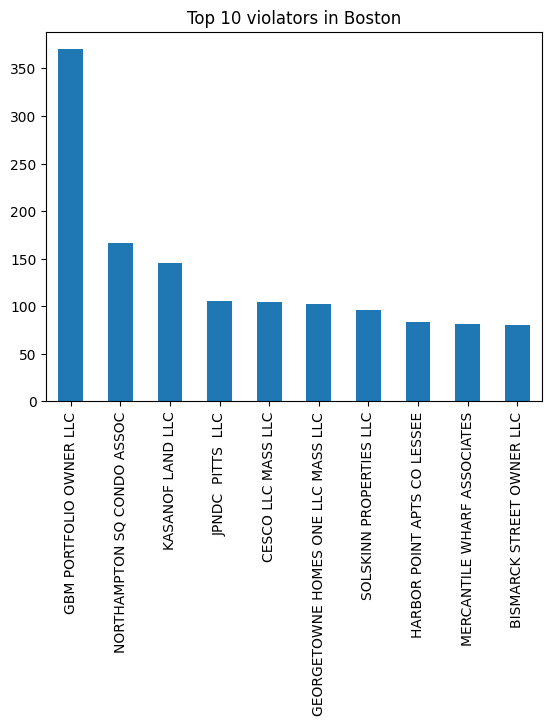

In [418]:
top_10_type_owners_all.plot(kind='bar', title = 'Top 10 violators in Boston')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in Boston'}>

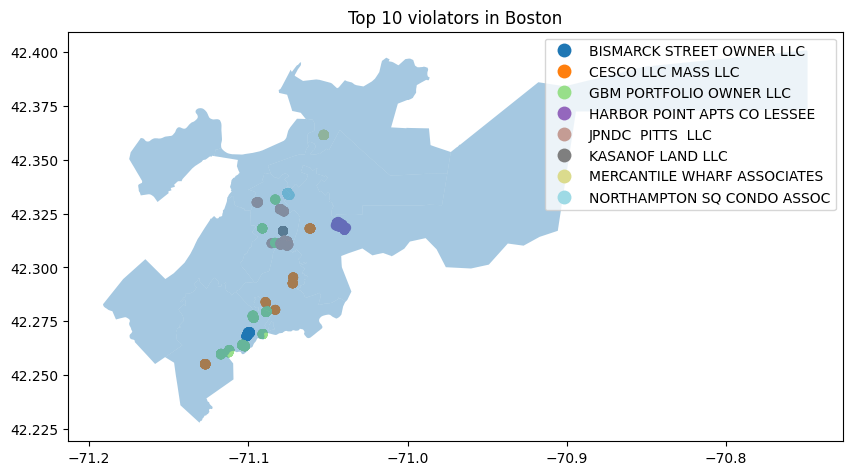

In [419]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_all_filtered_owner['longitude'], geo_all_filtered_owner['latitude'])]

crs = {'init': 'epsg:4326'}

geo_all_districts_own = gpd.GeoDataFrame(geo_all_filtered_owner, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in Boston')

geo_all_districts_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)